# Feature Engineering

This is the detailed backup to my submission. It can act as the Appendix of that submission.

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

import math
pd.set_option('display.float_format', '{:.2f}'.format)

from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

import eli5
from eli5.sklearn import PermutationImportance

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('./data/games.csv')
players = pd.read_csv('./data/players.csv')
plays = pd.read_csv('./data/plays.csv')
tackles = pd.read_csv('./data/tackles.csv')
week1 = pd.read_csv('./data/tracking_week_1.csv')
week2 = pd.read_csv('./data/tracking_week_2.csv')
week3 = pd.read_csv('./data/tracking_week_3.csv')
week4 = pd.read_csv('./data/tracking_week_4.csv')
week5 = pd.read_csv('./data/tracking_week_5.csv')
week6 = pd.read_csv('./data/tracking_week_6.csv')
week7 = pd.read_csv('./data/tracking_week_7.csv')
week8 = pd.read_csv('./data/tracking_week_8.csv')
week9 = pd.read_csv('./data/tracking_week_9.csv')

To combine all the 9 weeks of tracking data into one dataframe. 

In [3]:
all_weeks = [week1, week2, week3, week4, week5, week6, week7, week8, week9]

In [4]:
weeks = pd.concat(all_weeks)

In [5]:
weeks

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.00,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.00,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.00,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.00,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.00,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.00,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.00,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.00,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.00,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.00,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150018,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle
1150019,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN
1150020,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN
1150021,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN


In [6]:
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17


In [7]:
games_weeks = games[['gameId', 'week']]

In [8]:
games_weeks

,gameId,week
0,2022090800,1
1,2022091100,1
2,2022091101,1
3,2022091102,1
4,2022091103,1
...,...,...
131,2022110607,9
132,2022110608,9
133,2022110609,9
134,2022110610,9


In [9]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


To first convert the players' heights into total inches and then to get the total mass of the players by combining their height and weight. 

In [10]:
players['totalInches'] = (players.height.str.split("-").str[0].astype(int) * 12) + (
    players.height.str.split("-").str[1].astype(int)
)
players['mass'] = (players['totalInches']/12 * players['weight']).round(2)

In [11]:
plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.98,0.02,-0.01,0.01,2.36,0.98,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.16,0.84,-0.01,0.01,1.73,-0.26,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.76,0.24,-0.04,0.04,1.31,1.13,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.62,0.38,-0.00,0.00,1.64,-0.04,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.84,0.16,0.00,-0.00,3.69,-0.17,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,0.64,0.36,-0.01,0.01,3.64,-0.50,NaN,NaN,NaN,NaN
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,0.62,0.38,-0.03,0.03,1.43,-0.44,NaN,NaN,NaN,NaN
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,0.67,0.33,-0.01,0.01,2.12,0.20,NaN,NaN,NaN,NaN
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,0.41,0.59,-0.05,0.05,3.95,-0.98,NaN,NaN,NaN,NaN


Since playId is "...not unique across games" I'll combine that column and gameId to create a new variable called gamePlayId to have a unique identifier for each play.

In [12]:
plays['gamePlayId'] = plays[['gameId', 'playId']].astype(str).apply(lambda x: ''.join(x), axis=1)
plays['gamePlayId'] = plays['gamePlayId'].astype('int64')

To add the week number to each of the plays. 

In [13]:
plays = pd.merge(plays, games_weeks, on='gameId', how='left')

In [14]:
plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,gamePlayId,week
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,-0.01,0.01,2.36,0.98,NaN,NaN,NaN,NaN,20221009083537,5
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,-0.01,0.01,1.73,-0.26,NaN,NaN,NaN,NaN,20220911033126,1
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,-0.04,0.04,1.31,1.13,NaN,NaN,NaN,NaN,20220911111148,1
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,-0.00,0.00,1.64,-0.04,NaN,NaN,NaN,NaN,20221002122007,4
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.00,-0.00,3.69,-0.17,NaN,NaN,NaN,NaN,20220919001372,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,-0.01,0.01,3.64,-0.50,NaN,NaN,NaN,NaN,2022100204123,4
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,-0.03,0.03,1.43,-0.44,NaN,NaN,NaN,NaN,20220912003467,1
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,-0.01,0.01,2.12,0.20,NaN,NaN,NaN,NaN,20221016053371,6
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,-0.05,0.05,3.95,-0.98,NaN,NaN,NaN,NaN,20221002072777,4


In [15]:
tackles

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


To again create the unique gamePlayId value for each play. Since I'll be creating a tackles value later in this work, I've changed the name of the tackle column to tackler. 

In [16]:
tackles['gamePlayId'] = tackles[['gameId', 'playId']].astype(str).apply(lambda x: ''.join(x), axis=1)
tackles['gamePlayId'] = tackles['gamePlayId'].astype('int64')
tackles.rename(columns={'tackle':'tackler'}, inplace=True)

To add the game week to the plays in the tackles dataframe. 

In [17]:
tackles = pd.merge(tackles, games_weeks, on=['gameId'], how='left')

In [18]:
tackles

,gameId,playId,nflId,tackler,assist,forcedFumble,pff_missedTackle,gamePlayId,week
0,2022090800,101,42816,1,0,0,0,2022090800101,1
1,2022090800,393,46232,1,0,0,0,2022090800393,1
2,2022090800,486,40166,1,0,0,0,2022090800486,1
3,2022090800,646,47939,1,0,0,0,2022090800646,1
4,2022090800,818,40107,1,0,0,0,2022090800818,1
...,...,...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1,20220911132494,1
17422,2022092502,3510,42406,0,0,0,1,20220925023510,3
17423,2022091113,3642,43478,0,0,0,1,20220911133642,1
17424,2022091901,3578,42431,0,0,0,1,20220919013578,2


To again create the unique gamePlayId value for the weeks dataframe. 

In [19]:
weeks['gamePlayId'] = weeks[['gameId', 'playId']].astype(str).apply(lambda x: ''.join(x), axis=1)
weeks['gamePlayId'] = weeks['gamePlayId'].astype('int64')

To drop columns I won't need in the future. 

In [20]:
weeks.drop(columns=['time', 'jerseyNumber', 'playDirection'], inplace=True)

To merge the tackles and players dataframes into the primary weeks dataframe, and then drop some of the players columns I won't need going forward. 

In [21]:
weeks = pd.merge(weeks, tackles, on=['gameId','playId','nflId','gamePlayId'], how='left')

In [22]:
weeks = weeks.drop('week', axis=1)

In [23]:
weeks = pd.merge(weeks, players, on=['nflId','displayName'], how='left')

In [24]:
weeks.drop(['height', 'weight', 'birthDate', 'collegeName'], axis=1, inplace=True)

One of the most important concepts in tackling is how many yards the ball carrier gained after they received the ball, either by a handoff or a caught pass. I'm calling that event a transfer and I'll change the handoff and pass_outcome_caught event values to a transfer. 

Before making this change I want to create a new column called 'playType' to identify pass vs run plays based on these two event types. 

In [25]:
weeks['playType'] = np.where(weeks['event']=='handoff', 'run', 0)

In [26]:
weeks['playType'] = np.where(weeks['event']=='pass_outcome_caught', 'pass', weeks['playType'])

In [27]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,...,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType
0,2022090800,56,35472.00,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
1,2022090800,56,35472.00,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,...,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
2,2022090800,56,35472.00,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
3,2022090800,56,35472.00,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
4,2022090800,56,35472.00,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,football,26.22,19.68,1.37,2.58,...,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12187394,2022110700,3787,NaN,football,41,football,26.32,19.61,1.07,2.74,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12187395,2022110700,3787,NaN,football,42,football,26.39,19.56,0.80,2.49,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12187396,2022110700,3787,NaN,football,43,football,26.45,19.52,0.57,2.38,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# To Expand Play Types To All Rows in Each gamePlayId Group

Initially the play type value is only showing up the frame where it occured. I want to expand that to all the frames in each play. 

In [28]:
weeks_playtype = weeks[['gamePlayId', 'playType']]

In [29]:
weeks_playtype

,gamePlayId,playType
0,202209080056,0
1,202209080056,0
2,202209080056,0
3,202209080056,0
4,202209080056,0
...,...,...
12187393,20221107003787,0
12187394,20221107003787,0
12187395,20221107003787,0
12187396,20221107003787,0


In [30]:
grouped_playtype = weeks_playtype.groupby(['gamePlayId']).max().reset_index()

In [31]:
grouped_playtype

,gamePlayId,playType
0,202209080056,pass
1,202209080080,0
2,202209110057,0
3,202209110078,run
4,202209110185,pass
...,...,...
12481,20221107003658,run
12482,20221107003686,run
12483,20221107003707,run
12484,20221107003740,run


There are still a small number of plays that have not been identified as a run or pass because they didn't contain a handoff or a caught pass. I'm calling these direct plays and assuming they occured from either a quarterback sack, a quarterback run or a run with a direct snap to a running back or receiver. 

In [32]:
grouped_playtype['playType'].value_counts()

run     5876
pass    5646
0        964
Name: playType, dtype: int64

In [33]:
grouped_playtype['playType'] = np.where(grouped_playtype['playType']=='0', 'direct', grouped_playtype['playType'])

In [34]:
grouped_playtype['playType'].value_counts()

run       5876
pass      5646
direct     964
Name: playType, dtype: int64

In [35]:
grouped_playtype

,gamePlayId,playType
0,202209080056,pass
1,202209080080,direct
2,202209110057,direct
3,202209110078,run
4,202209110185,pass
...,...,...
12481,20221107003658,run
12482,20221107003686,run
12483,20221107003707,run
12484,20221107003740,run


In [36]:
weeks = pd.merge(weeks, grouped_playtype, on=['gamePlayId'], how='left')

In [37]:
weeks = weeks.drop('playType_x', axis=1)

In [38]:
weeks.rename(columns={'playType_y':'playType'}, inplace=True)

In [39]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,...,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType
0,2022090800,56,35472.00,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
1,2022090800,56,35472.00,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,...,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
2,2022090800,56,35472.00,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
3,2022090800,56,35472.00,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
4,2022090800,56,35472.00,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,...,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,football,26.22,19.68,1.37,2.58,...,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run
12187394,2022110700,3787,NaN,football,41,football,26.32,19.61,1.07,2.74,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run
12187395,2022110700,3787,NaN,football,42,football,26.39,19.56,0.80,2.49,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run
12187396,2022110700,3787,NaN,football,43,football,26.45,19.52,0.57,2.38,...,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run


# Developing a Ball Location Metric

I want to be able to track where the ball is at each frame for each play. To do this, I'll initially note the coordinates where the ball is on the frame where the ball carrier ID is the same as the player's NFL ID. 

First, I'll merge the plays and games dataframes into the primary weeks dataframe. 

In [40]:
pd.options.display.max_columns = None
plays.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,gamePlayId,week
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.00,NaN,9,9,N,69,SHOTGUN,7.00,0.75,0.98,0.02,-0.01,0.01,2.36,0.98,NaN,NaN,NaN,NaN,20221009083537,5
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.00,0.42,0.16,0.84,-0.01,0.01,1.73,-0.26,NaN,NaN,NaN,NaN,20220911033126,1
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.00,NaN,15,15,N,40,I_FORM,6.00,0.27,0.76,0.24,-0.04,0.04,1.31,1.13,NaN,NaN,NaN,NaN,20220911111148,1
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.00,0.59,0.62,0.38,-0.00,0.00,1.64,-0.04,NaN,NaN,NaN,NaN,20221002122007,4
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.00,0.47,0.84,0.16,0.00,-0.00,3.69,-0.17,NaN,NaN,NaN,NaN,20220919001372,2


In [41]:
plays_merge = plays[['gameId','playId','gamePlayId','absoluteYardlineNumber','ballCarrierId','quarter','possessionTeam',
                     'defensiveTeam','playResult', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox']]

In [42]:
plays_merge

,gameId,playId,gamePlayId,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox
0,2022100908,3537,20221009083537,69,48723,4,ATL,TB,9,1,10,SHOTGUN,7.00
1,2022091103,3126,20220911033126,76,52457,4,PIT,CIN,3,1,10,SHOTGUN,7.00
2,2022091111,1148,20220911111148,40,42547,2,LV,LAC,15,2,5,I_FORM,6.00
3,2022100212,2007,20221002122007,47,46461,3,DEN,LV,7,2,10,SINGLEBACK,6.00
4,2022091900,1372,20220919001372,75,47857,2,BUF,TEN,3,1,10,I_FORM,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,2022100204123,49,43293,1,DAL,WAS,1,1,10,SINGLEBACK,6.00
12482,2022091200,3467,20220912003467,40,46189,4,SEA,DEN,2,1,10,SINGLEBACK,7.00
12483,2022101605,3371,20221016053371,69,44860,4,CIN,NO,6,1,10,SHOTGUN,6.00
12484,2022100207,2777,20221002072777,44,52449,3,IND,TEN,-2,1,10,SHOTGUN,6.00


In [43]:
weeks = pd.merge(weeks, plays_merge, on=['gameId','playId','gamePlayId'], how='left')

In [44]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox
0,2022090800,56,35472.00,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
1,2022090800,56,35472.00,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
2,2022090800,56,35472.00,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
3,2022090800,56,35472.00,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
4,2022090800,56,35472.00,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,football,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00
12187394,2022110700,3787,NaN,football,41,football,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00
12187395,2022110700,3787,NaN,football,42,football,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00
12187396,2022110700,3787,NaN,football,43,football,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00


In [45]:
games_merge = games[['gameId', 'week', 'homeTeamAbbr', 'visitorTeamAbbr']]

In [46]:
weeks = pd.merge(weeks, games_merge, on=['gameId'], how='left')

In [47]:
weeks['nflId'] = weeks['nflId'].fillna(0)

In [48]:
weeks['nflId'] = weeks['nflId'].astype(int)

In [49]:
weeks['nflId'].isna().sum()

0

I'll create new a new metric for both the x and y coordinates that identifies where the ball carrier is the same as the NFL ID. This is where the ball is located on the x and y coordinates for a particular frame within a play. 

In [50]:
weeks['xBallLocation'] = np.where(weeks['ballCarrierId'] == weeks['nflId'], weeks['x'], 0)
weeks['yBallLocation'] = np.where(weeks['ballCarrierId'] == weeks['nflId'], weeks['y'], 0)

In [51]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,0,football,40,football,26.22,19.68,1.37,2.58,0.15,NaN,NaN,tackle,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00
12187394,2022110700,3787,0,football,41,football,26.32,19.61,1.07,2.74,0.12,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00
12187395,2022110700,3787,0,football,42,football,26.39,19.56,0.80,2.49,0.09,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00
12187396,2022110700,3787,0,football,43,football,26.45,19.52,0.57,2.38,0.07,NaN,NaN,NaN,20221107003787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,0.00,0.00


To show the xBallLocation and yBallLocation for all the frames of a particular play. 

In [52]:
weeks['xBallLocation'] = weeks.groupby(['gamePlayId', 'frameId'])['xBallLocation'].transform(max)
weeks['yBallLocation'] = weeks.groupby(['gamePlayId', 'frameId'])['yBallLocation'].transform(max)

I want to track how far each player is on each from from the ball. To do that I'll take create a Ball Distance variable that uses the Pythagorean formula to map the distance each player's combined x and y coordinates are from the combined x and y ball coordinates. When that player is the ball carrier, his distance should be 0. 

In [53]:
weeks['ballDistance'] = np.sqrt((weeks['xBallLocation'] - weeks['x']) ** 2 + (weeks['yBallLocation'] - weeks['y']) ** 2)

This is to eliminate all rows where the play name is "football". 

In [54]:
weeks = weeks[weeks.displayName != 'football']

In [55]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,13.23
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,13.01
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,12.81
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,12.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,3.19
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,3.15
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,3.07
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,2.96


In [56]:
weeks['ballDistance'].describe()

count   11657338.00
mean          11.14
std            9.29
min            0.00
25%            4.28
50%            8.46
75%           16.27
max          104.74
Name: ballDistance, dtype: float64

In [57]:
count = weeks['ballDistance'].lt(1).sum()
print(count)

906197


In [58]:
count = weeks['ballDistance'].lt(.05).sum()
print(count)

526769


In [59]:
count = weeks['ballDistance'].lt(.0001).sum()
print(count)

525986


# Setting Up A Player Direction vs Ball Carrier Direction

One of the aspects that could be important to tackling is the direction of the tacklers compared to the direction of the ball carrier. First, I'll create this dirBallCarrier variable that identifies the direction of the ball carrier of each frame. 

In [60]:
weeks['dirBallCarrier'] = np.where(weeks['ballCarrierId'] == weeks['nflId'], weeks['dir'], 0)

In [61]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,0.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,13.23,0.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,13.01,0.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,12.81,0.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,12.67,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,3.19,0.00
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,3.15,0.00
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,3.07,0.00
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,2.96,0.00


Next I'll spread that value to all the frames of a play. 

In [62]:
weeks['dirBallCarrier'] = weeks.groupby(['gamePlayId', 'frameId'])['dirBallCarrier'].transform(max)

Finally, I'll create a dirBallVariance to measure the difference between the ball carrier's direction and every other player of a particular frame. 

In [63]:
weeks['dirBallVariance'] = np.minimum(((weeks['dir'] - weeks['dirBallCarrier']).abs()), (360-(weeks['dir'] - weeks['dirBallCarrier']).abs()))

In [64]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,13.23,191.08,42.55
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,13.01,194.40,47.35
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,12.81,196.97,51.55
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,12.67,199.54,57.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,3.19,121.39,6.12
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,3.15,120.45,2.28
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,3.07,125.47,5.30
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,2.96,171.35,48.20


In physics momentum is speed times mass and force is acceleration times mass. These two values measure the momentum and force of every player. 

In [65]:
weeks['momentum'] = ((weeks['s'] * weeks['mass']).round(2))/1000
weeks['force'] = ((weeks['a'] * weeks['mass']).round(2))/1000

I want to measure the impact of every tackler on the ball carrier as they make their tackles. So the momentum vector and force vectors are the force and momemtum times the variance of the direction the tackler is vs the ball carrier. 

The greater the number should be the greater the impact on the ball carrier. If the tackler was facing the same direction as the ball carrier, then the impact should be small as the are probably tackling the ball carrier from behind. However if they tackle the ball carrier head on, their variance should be the highest number, since they are facing opposite directions, and their impact would be the highest. 

In [66]:
weeks['momemtumVector'] = (weeks['momentum'] * weeks['dirBallVariance']).round()
weeks['forceVector'] = (weeks['force'] * weeks['dirBallVariance']).round()

# Create a Snap Event at FrameId 1

Over half the plays in this dataset do not have a snap event. Since every play from the line of scrimmage in an NFL game has a snap, this is something that needs to be corrected. To keep is simple, I'll just have all snap events occur on the first frame. 

In [67]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,13.23,191.08,42.55,3.48,1.27,148.00,54.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,13.01,194.40,47.35,3.27,1.02,155.00,48.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,12.81,196.97,51.55,3.00,1.86,155.00,96.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,12.67,199.54,57.59,2.69,2.59,155.00,149.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,3.19,121.39,6.12,3.23,1.90,20.00,12.00
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,3.15,120.45,2.28,3.13,1.84,7.00,4.00
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,3.07,125.47,5.30,2.97,1.90,16.00,10.00
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,2.96,171.35,48.20,2.79,2.04,134.00,98.00


In [68]:
weeks = weeks[weeks.event !='ball_snap']

In [69]:
weeks['event'] = np.where(weeks['frameId']==1, 'snap', weeks['event'])

# Mapping the Distance for Different Events

Like many sports football is about territory. The better a player or a team is at tackling, the less territory they give up. Therefore, one of the key metrics of succesfull tackling is minimizing the number of yards a ball carrier gets after they get the ball, whether it's through a handoff or a catch. So, based on the events in this dataset, the best measure of tackling effectiveness is the number of yards from a ball transfer (handoff or catch) to a tackle. In this section, I'll develop this metric and a number of related metrics. 

In [70]:
weeks

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00
1,2022090800,56,35472,Rodger Saffold,2,BUF,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.48,37.68,13.23,191.08,42.55,3.48,1.27,148.00,54.00
2,2022090800,56,35472,Rodger Saffold,3,BUF,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.34,37.09,13.01,194.40,47.35,3.27,1.02,155.00,48.00
3,2022090800,56,35472,Rodger Saffold,4,BUF,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.19,36.53,12.81,196.97,51.55,3.00,1.86,155.00,96.00
4,2022090800,56,35472,Rodger Saffold,5,BUF,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.01,36.00,12.67,199.54,57.59,2.69,2.59,155.00,149.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187349,2022110700,3787,55125,Lewis Kidd,40,NO,23.41,21.19,1.60,0.94,0.16,108.00,115.27,tackle,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,3.19,121.39,6.12,3.23,1.90,20.00,12.00
12187350,2022110700,3787,55125,Lewis Kidd,41,NO,23.55,21.12,1.55,0.91,0.16,112.25,118.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.34,19.66,3.15,120.45,2.28,3.13,1.84,7.00,4.00
12187351,2022110700,3787,55125,Lewis Kidd,42,NO,23.68,21.04,1.47,0.94,0.15,115.80,120.17,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.40,19.62,3.07,125.47,5.30,2.97,1.90,16.00,10.00
12187352,2022110700,3787,55125,Lewis Kidd,43,NO,23.80,20.96,1.38,1.01,0.14,119.27,123.15,NaN,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.42,19.58,2.96,171.35,48.20,2.79,2.04,134.00,98.00


To rename the pass outcomes and handoff events to transfer events. 

In [71]:
weeks['event'] = np.where(weeks['event']=='pass_outcome_caught', 'transfer', weeks['event'])

In [72]:
weeks['event'] = np.where(weeks['event']=='handoff', 'transfer', weeks['event'])

In [73]:
weeks_events = weeks[weeks['event'].notna()]

To drop the events I'm not looking to track. There are a lot of these, but there overall counts are small. 

In [74]:
weeks_events.rename(columns={'tackle':'tackler'}, inplace=True)

In [75]:
drop_events = ['pass_arrived', 'run', 'man_in_motion', 'play_action', 'shift', 'qb_slide', 'pass_forward', 'touchdown', 
               'lateral', 'line_set', 'snap_direct', 'autoevent_ballsnap', 'fumble_offense_recovered', 'run_pass_option', 
               'pass_shovel', 'fumble_defense_recovered', 'qb_sack', 'autoevent_passinterrupted', 'autoevent_passforward',
              'pass_outcome_touchdown','penalty_accepted', 'penalty_flag', 'safety']

In [76]:
weeks_events = weeks_events[~weeks_events.event.isin(drop_events)]

In [77]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,12.34,121.39,70.01,1.99,2.48,139.00,174.00
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,5.92,81.54,109.99,0.02,0.02,2.00,2.00
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,5.20,143.84,34.17,1.52,2.02,52.00,69.00
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1.05,104.41,32.45,3.40,1.11,110.00,36.00


I want to create separate columns for each of the remaining events to I can start tracking the distance between these events, including my ultimate goal of tracking the distance between a transfer and a tackle. I'll use the process of creating dummy variables to do this. 

In [78]:
weeks_events_merge = weeks_events[['gamePlayId', 'event']]

In [79]:
weeks_events_merge

,gamePlayId,event
0,202209080056,snap
5,202209080056,transfer
17,202209080056,tackle
22,202209080056,snap
27,202209080056,transfer
...,...,...
12187305,20221107003787,tackle
12187310,20221107003787,snap
12187324,20221107003787,transfer
12187338,20221107003787,first_contact


In [80]:
event_dummies = pd.get_dummies(weeks_events_merge['event'])

In [81]:
event_dummies

,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,0,0,0,1,0,0
5,0,0,0,0,0,1
17,0,0,0,0,1,0
22,0,0,0,1,0,0
27,0,0,0,0,0,1
...,...,...,...,...,...,...
12187305,0,0,0,0,1,0
12187310,0,0,0,1,0,0
12187324,0,0,0,0,0,1
12187338,1,0,0,0,0,0


In [82]:
weeks_events_merge = pd.concat([weeks_events_merge, event_dummies], axis=1) 
weeks_events_merge.drop(['event'], inplace=True, axis=1)
weeks_events_merge.drop(['gamePlayId'], inplace=True, axis=1)

In [83]:
weeks_events_merge

,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,0,0,0,1,0,0
5,0,0,0,0,0,1
17,0,0,0,0,1,0
22,0,0,0,1,0,0
27,0,0,0,0,0,1
...,...,...,...,...,...,...
12187305,0,0,0,0,1,0
12187310,0,0,0,1,0,0
12187324,0,0,0,0,0,1
12187338,1,0,0,0,0,0


In [84]:
weeks_events_merge.apply(pd.Series.value_counts)

,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,791582,1020998,983488,748682,802406,769384
1,231726,2310,39820,274626,220902,253924


In [85]:
weeks_events = pd.concat([weeks_events, weeks_events_merge], axis=1)

In [86]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1.05,104.41,32.45,3.40,1.11,110.00,36.00,1,0,0,0,0,0


In [87]:
weeks_events['xSnap'] = np.where(weeks_events['snap'] == 1, weeks_events['x'], 0)
weeks_events['ySnap'] = np.where(weeks_events['snap'] == 1, weeks_events['y'], 0)
weeks_events['xContact'] = np.where(weeks_events['first_contact'] == 1, weeks_events['x'], 0)
weeks_events['yContact'] = np.where(weeks_events['first_contact'] == 1, weeks_events['y'], 0)
weeks_events['xTransfer'] = np.where(weeks_events['transfer'] == 1, weeks_events['x'], 0)
weeks_events['yTransfer'] = np.where(weeks_events['transfer'] == 1, weeks_events['y'], 0)
weeks_events['xTackle'] = np.where(weeks_events['tackle'] == 1, weeks_events['x'], 0)
weeks_events['yTackle'] = np.where(weeks_events['tackle'] == 1, weeks_events['y'], 0)

In [88]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,0.00,0.00,0.00,0.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,0.00,0.00,0.00,0.00,88.80,26.70,0.00,0.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,88.23,27.09
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,0.00,0.00,0.00,0.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,0.00,0.00,0.00,0.00,78.11,28.74,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,33.45,29.73
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,0.00,0.00,0.00,0.00,0.00,0.00
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,0.00,0.00,0.00,0.00,20.72,21.29,0.00,0.00
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1.05,104.41,32.45,3.40,1.11,110.00,36.00,1,0,0,0,0,0,0.00,0.00,21.51,21.41,0.00,0.00,0.00,0.00


To spread the event locations for each of the players in a play. That can become the basis for how ground they cover between events for each play. 

In [89]:
event_locations = ['xSnap', 'ySnap', 'xContact', 'yContact', 'xTransfer', 'yTransfer', 'xTackle', 'yTackle']

In [90]:
for i in event_locations:
    weeks_events[i] = weeks_events.groupby(['gamePlayId', 'nflId'])[i].transform(max)

In [91]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,32.50,34.76,33.99,33.10,32.96,34.84,33.45,29.73
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1.05,104.41,32.45,3.40,1.11,110.00,36.00,1,0,0,0,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19


I want to track how far each play moves between each event in a play. To do that, I'll use the Pythagorean formula to record the distance the player moves from the x, y coordinates at one event to the x, y coordinates of the next event. This is how much ground they cover between these events. 

In [92]:
weeks_events['snapToTransfer'] = np.where((weeks_events['xSnap'] > 0) & (weeks_events['xTransfer'] > 0),
                                       (np.sqrt((weeks_events['xTransfer'] - weeks_events['xSnap']) ** 2 + (weeks_events['yTransfer'] - weeks_events['ySnap']) ** 2)), 0)

weeks_events['transferToContact'] = np.where((weeks_events['xTransfer'] > 0) & (weeks_events['xContact'] > 0),
                                       (np.sqrt((weeks_events['xContact'] - weeks_events['xTransfer']) ** 2 + (weeks_events['yContact'] - weeks_events['yTransfer']) ** 2)), 0)

weeks_events['transferToTackle'] = np.where((weeks_events['xTransfer'] > 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xTransfer']) ** 2 + (weeks_events['yTackle'] - weeks_events['yTransfer']) ** 2)), 0)

weeks_events['contactToTackle'] = np.where((weeks_events['xContact'] > 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xContact']) ** 2 + (weeks_events['yTackle'] - weeks_events['yContact']) ** 2)), 0)

weeks_events['snapToTackle'] = np.where((weeks_events['xSnap'] > 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xSnap']) ** 2 + (weeks_events['yTackle'] - weeks_events['ySnap']) ** 2)), 0)

weeks_events['snapToContact'] = np.where((weeks_events['xSnap'] > 0) & (weeks_events['xContact'] > 0),
                                       (np.sqrt((weeks_events['xContact'] - weeks_events['xSnap']) ** 2 + (weeks_events['yContact'] - weeks_events['ySnap']) ** 2)), 0)
                                     

In [93]:
weeks_events['transferToTackle'] = np.where((weeks_events['xTransfer'] == 0) & (weeks_events['xTackle'] > 0),
                                       (np.sqrt((weeks_events['xTackle'] - weeks_events['xSnap']) ** 2 + (weeks_events['yTackle'] - weeks_events['ySnap']) ** 2)),
                                           weeks_events['transferToTackle'])

In [94]:
team_yards = weeks_events.groupby('defensiveTeam').agg(
    SnapToTransferYards=('snapToTransfer', 'mean'),
    SnapToContactYards=('snapToContact', 'mean'),
    SnapToTackleYards=('snapToTackle', 'mean'),
    TransferToContactYards=('transferToContact', 'mean'),
    ContactToTackleYards=('contactToTackle', 'mean'),
    TransferToTackleYards=('transferToTackle', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
team_yards_sorted = team_yards.sort_values(by='defensiveTeam')

team_yards_sorted

,defensiveTeam,SnapToTransferYards,SnapToContactYards,SnapToTackleYards,TransferToContactYards,ContactToTackleYards,TransferToTackleYards
0,ARI,1.89,5.22,6.92,3.64,3.00,6.01
1,ATL,1.90,4.77,6.54,3.26,2.84,5.51
2,BAL,1.86,5.08,6.42,3.54,2.76,5.48
3,BUF,1.88,5.35,6.93,3.62,3.01,5.92
4,CAR,1.99,5.23,6.68,3.56,2.85,5.59
5,CHI,1.99,5.85,7.24,4.04,3.05,6.20
6,CIN,2.04,5.40,7.23,3.48,2.81,6.04
7,CLE,1.92,5.48,6.80,3.94,2.89,5.80
8,DAL,1.95,5.33,6.87,3.66,2.64,5.78
9,DEN,1.87,4.73,6.41,3.20,2.85,5.40


In [95]:
ballDistance_yards = weeks_events.groupby('tackler').agg(
    BallDistance=('ballDistance', 'mean'),

    
).reset_index()

# Sort teams by total tackles in descending order
ballDistance_yards_sorted = ballDistance_yards.sort_values(by='tackler')

ballDistance_yards_sorted

,tackler,BallDistance
0,0.00,6.11
1,1.00,5.06


In [96]:
ballDistanceAssist_yards = weeks_events.groupby('assist').agg(
    BallDistance=('ballDistance', 'mean'),

    
).reset_index()

# Sort teams by total tackles in descending order
ballDistanceAssist_yards_sorted = ballDistanceAssist_yards.sort_values(by='assist')

ballDistanceAssist_yards_sorted

,assist,BallDistance
0,0.00,5.43
1,1.00,5.70


In [97]:
play_yards = weeks_events.groupby('gamePlayId').agg(
    SnapToTransferYards=('snapToTransfer', 'mean'),
    SnapToContactYards=('snapToContact', 'mean'),
    SnapToTackleYards=('snapToTackle', 'mean'),
    TransferToContactYards=('transferToContact', 'mean'),
    ContactToTackleYards=('contactToTackle', 'mean'),
    TransferToTackleYards=('transferToTackle', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
play_yards_sorted = play_yards.sort_values(by='gamePlayId')

play_yards_sorted.head(15)

,gamePlayId,SnapToTransferYards,SnapToContactYards,SnapToTackleYards,TransferToContactYards,ContactToTackleYards,TransferToTackleYards
0,202209080056,1.44,0.00,4.03,0.00,0.00,2.92
1,202209080080,0.00,5.53,7.66,0.00,2.48,7.66
2,202209110057,0.00,15.52,17.62,0.00,2.55,17.62
3,202209110078,3.38,7.87,8.50,6.87,5.11,9.08
4,202209110185,1.93,2.88,5.89,1.01,3.87,4.66
5,202209110286,2.08,7.11,11.27,5.48,4.97,9.79
6,202209110358,1.76,2.78,5.02,1.08,2.46,3.49
7,202209110382,2.03,0.00,0.00,0.00,0.00,0.00
8,202209110458,2.02,3.59,5.94,1.65,2.58,4.17
9,202209110486,2.38,5.40,32.46,3.71,30.98,32.50


In [98]:
table = pd.pivot_table(weeks_events, values='transferToTackle', index=['defensiveTeam'],
                       columns=['week'], aggfunc="mean", margins="True", margins_name='Overall')
table = table.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table

week,1,2,3,4,5,6,7,8,9,Overall
defensiveTeam,,,,,,,,,,
Overall,5.66,5.94,5.61,5.92,5.76,5.66,5.66,5.74,5.71,5.74
MIA,4.57,5.23,5.33,6.32,6.41,4.11,4.35,5.27,5.97,5.31
DEN,5.25,4.84,6.39,5.31,4.70,5.34,5.45,5.92,NaN,5.40
TEN,5.33,5.44,4.63,5.37,5.55,NaN,5.61,6.34,5.34,5.41
NO,5.95,4.85,6.71,4.22,5.73,4.37,5.55,5.22,6.13,5.42
MIN,5.56,5.07,5.34,5.67,4.80,5.99,NaN,5.04,5.95,5.42
PHI,5.31,5.21,4.68,6.08,5.25,4.76,NaN,5.44,7.11,5.43
NYJ,6.09,6.45,5.09,6.39,6.21,4.71,4.19,5.26,4.51,5.43
BAL,5.33,5.50,5.92,5.05,6.33,6.21,5.01,5.11,4.46,5.48


In [99]:
table = pd.pivot_table(weeks_events, values='transferToTackle', index=['defensiveTeam'],
                       columns=['playType'], aggfunc="mean", margins="True", margins_name='Overall')
table = table.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table

playType,direct,pass,run,Overall
defensiveTeam,,,,
Overall,5.69,4.53,6.85,5.74
MIA,6.23,4.67,5.90,5.31
DEN,5.32,3.89,6.78,5.40
TEN,4.64,4.58,6.67,5.41
NO,5.72,3.83,6.71,5.42
MIN,5.11,4.40,6.63,5.42
PHI,6.44,4.28,6.51,5.43
NYJ,4.67,3.86,6.87,5.43
BAL,3.91,4.64,6.76,5.48


In [100]:
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,32.50,34.76,33.99,33.10,32.96,34.84,33.45,29.73,0.47,2.02,5.13,3.41,5.12,2.23
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,22.56,21.40,1.05,104.41,32.45,3.40,1.11,110.00,36.00,1,0,0,0,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44


Now I want to track the distance the ball moves for each event. Since the ball is only moving in the x coordinate, I will only utilize the xBallLocation. First, I'll mark where the ball is for each key event. 

In [101]:
weeks_events['xBallSnap'] = np.where(weeks_events['snap'] == 1, weeks_events['xBallLocation'], 0)
weeks_events['xBallTransfer'] = np.where(weeks_events['transfer'] == 1, weeks_events['xBallLocation'], 0)
weeks_events['xBallContact'] = np.where(weeks_events['first_contact'] == 1, weeks_events['xBallLocation'], 0)
weeks_events['xBallTackle'] = np.where(weeks_events['tackle'] == 1, weeks_events['xBallLocation'], 0)

In [102]:
pd.options.display.max_columns = None
weeks_events

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,0.00,0.00,0.00
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,0.00,79.85,0.00,0.00
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,0.00,0.00,0.00,79.33
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,0.00,0.00,0.00
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,0.00,79.85,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606,Damarion Williams,40,BAL,33.45,29.73,1.92,2.40,0.21,216.18,191.40,tackle,20221107003787,NaN,NaN,NaN,NaN,CB,69.00,1035.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,12.34,121.39,70.01,1.99,2.48,139.00,174.00,0,0,0,0,1,0,32.50,34.76,33.99,33.10,32.96,34.84,33.45,29.73,0.47,2.02,5.13,3.41,5.12,2.23,0.00,0.00,0.00,26.24
12187310,2022110700,3787,55125,Lewis Kidd,1,NO,20.17,21.95,0.01,0.01,0.00,125.10,191.53,snap,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,15.85,26.00,5.92,81.54,109.99,0.02,0.02,2.00,2.00,0,0,0,1,0,0,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44,15.85,0.00,0.00,0.00
12187324,2022110700,3787,55125,Lewis Kidd,15,NO,20.72,21.29,0.75,1.00,0.08,109.96,178.01,transfer,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,16.69,24.58,5.20,143.84,34.17,1.52,2.02,52.00,69.00,0,0,0,0,0,1,20.17,21.95,21.51,21.41,20.72,21.29,23.41,21.19,0.86,0.80,2.69,1.91,3.33,1.44,0.00,16.69,0.00,0.00
12187338,2022110700,3787,55125,Lewis Kidd,29,NO,21.51,21.41,1.68,0.55,0.17,131.55,71.96,first_contact,20221107003787,NaN,NaN,NaN,NaN,G,78.00,2021.50,run,21,43525,4,NO,BAL,5,

Next, I will spread the ball location for each event to all the frames of each play. 

In [103]:
events_ball = ['xBallSnap', 'xBallTransfer', 'xBallContact', 'xBallTackle']

In [104]:
for i in events_ball:
    weeks_events[i] = weeks_events.groupby(['gamePlayId'])[i].transform(max)

To eliminate all rows where a tackle didn't occur, since I only want to look at plays where there was a tackle. 

In [105]:
weeks_events = weeks_events[weeks_events['xBallTackle']!=0]

For some plays there was no ball transfer. This means it was a direct play, so I'll have the ball transfer location equal the snap location. Also, there are plays where there is no contact and for these plays, I'll have the contact location equal the tackle location. 

In [106]:
weeks_events['xBallTransfer'] = np.where(weeks_events['xBallTransfer']== 0, weeks_events['xBallSnap'], weeks_events['xBallTransfer'])
weeks_events['xBallContact'] = np.where(weeks_events['xBallContact']== 0, weeks_events['xBallTackle'], weeks_events['xBallContact'])

Finally, I'll create the variables that measure how far the ball moved between each event. Obviously, the lower this value is the better for the defense and the higher, the better for the offense. 

In [107]:
weeks_events['ballSnapToTransfer'] = (weeks_events['xBallTransfer'] - weeks_events['xBallSnap']).abs()
weeks_events['ballSnapToContact'] = (weeks_events['xBallContact'] - weeks_events['xBallSnap']).abs()
weeks_events['ballTransferToContact'] = (weeks_events['xBallContact'] - weeks_events['xBallTransfer']).abs()
weeks_events['ballContactToTackle'] = (weeks_events['xBallTackle'] - weeks_events['xBallContact']).abs()
weeks_events['ballSnapToTackle'] = (weeks_events['xBallTackle'] - weeks_events['xBallSnap']).abs()
weeks_events['ballTransferToTackle'] = (weeks_events['xBallTackle'] - weeks_events['xBallTransfer']).abs()

In [108]:
weeks_events.head(10)

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,NaN,NaN,NaN,NaN,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
39,2022090800,56,38577,Bobby Wagner,18,LA,78.62,32.31,1.76,3.13,0.19,0.84,34.12,tackle,202209080056,NaN,NaN,NaN,NaN,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1.70,78.02,43.90,2.56,4.54,112.00,200.00,0,0,0,0,1,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
44,2022090800,56,41239,Aaron Donald,1,LA,91.08,31.61,3.91,2.34,0.40,168.33,132.02,snap,202209080056,NaN,NaN,NaN,NaN,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,12.43,189.38,57.36,6.66,3.99,382.00,229.00,0,0,0,1,0,0,91.08,31.61,0.00,0.00,92.15,29.96,91.04,27.66,1.97,0.00,2.55,0.00,3.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
49,2022090800,56,41239,Aaron Donald,6,LA,92.15,29.96,3.62,2.86,0.37,186.16,157.65,transfer,202209080056,NaN,NaN,NaN,NaN,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,13.53,202.20,44.55,6.17,4.87,275.00,217.00,0,0,0,0,0,1,91.08,31.61,0.00,0.00,92.15,29.96,91.04,27.66,1.97,0.00,2.55,0.00,3.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
61,2022090800,56,41239,Aaron Donald,18,LA,91.04,27.66,2.16,1.98,0.22,273.18,263.65,tackle,202209080056

We can see the results by team. These numbers are very high. The average yards from transfer to tackle is over 7. However, the yardage for the events seems to be much higher than the yardage of the play results. In this code I noted that the total play change between the frames is about 50% higher than the actual play results: https://www.kaggle.com/code/twinpilgrim/play-result-not-matching-the-frames-ball-movement. As I mentioned on the code, I'm not sure why. 

In [109]:
table = pd.pivot_table(weeks_events, values='ballTransferToTackle', index=['defensiveTeam'],
                       columns=['playType'], aggfunc="mean", margins="True", margins_name='Overall')
table = table.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table

playType,direct,pass,run,Overall
defensiveTeam,,,,
Overall,9.61,5.03,8.79,7.29
TEN,15.67,4.32,7.75,6.02
MIA,10.05,5.03,7.50,6.56
NO,9.12,3.78,8.35,6.67
NYJ,7.82,4.02,8.47,6.69
BUF,8.96,4.59,8.56,6.81
DEN,12.24,3.72,9.07,6.96
CAR,6.29,4.86,8.64,7.02
ATL,9.18,5.10,8.79,7.03


In [110]:
play_yards = weeks_events.groupby('gamePlayId').agg(
    PlayResult=('playResult', max),
    BallSnapToTransfer=('ballSnapToTransfer', max),
    BallSnapToContact=('ballSnapToContact', max),
    BallSnapToTackle=('ballSnapToTackle', max),
    BallTransferToContact=('ballTransferToContact', max),
    BallContactToTackle=('ballContactToTackle', max),
    BallTransferToTackle=('ballTransferToTackle', max),
    
).reset_index()

# Sort teams by total tackles in descending order
play_yards_sorted = play_yards.sort_values(by='gamePlayId')

play_yards_sorted.head(15)

,gamePlayId,PlayResult,BallSnapToTransfer,BallSnapToContact,BallSnapToTackle,BallTransferToContact,BallContactToTackle,BallTransferToTackle
0,202209080056,6,0.75,1.27,1.27,0.52,0.00,0.52
1,202209080080,7,0.00,8.27,10.70,8.27,2.43,10.70
2,202209110057,11,0.00,13.21,16.59,13.21,3.38,16.59
3,202209110078,6,0.78,10.89,13.61,10.11,2.72,12.83
4,202209110185,-5,0.14,0.30,3.11,0.44,2.81,3.25
5,202209110286,3,0.17,5.30,8.20,5.13,2.90,8.03
6,202209110358,3,1.34,2.30,4.51,0.96,2.21,3.17
7,202209110458,-1,1.59,3.15,5.29,1.56,2.14,3.70
8,202209110486,50,2.39,10.47,56.37,8.08,45.90,53.98
9,202209110556,4,0.12,4.61,8.76,4.49,4.15,8.64


In [111]:
team_yards = weeks_events.groupby('defensiveTeam').agg(
    TransferToTackleYards=('transferToTackle', 'mean'),
    BallTransferToTackle=('ballTransferToTackle', 'mean'),
    ForceVector=('forceVector', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
team_yards_sorted = team_yards.sort_values(by='defensiveTeam')

team_yards_sorted

,defensiveTeam,TransferToTackleYards,BallTransferToTackle,ForceVector
0,ARI,7.33,7.95,161.43
1,ATL,6.53,7.03,161.28
2,BAL,6.92,7.21,162.84
3,BUF,7.08,6.81,167.13
4,CAR,6.92,7.02,154.19
5,CHI,7.52,7.64,155.64
6,CIN,7.19,7.37,152.92
7,CLE,7.20,8.08,156.45
8,DAL,6.94,7.11,160.02
9,DEN,6.48,6.96,163.07


# Set Up the Data for Predictions

If my primary metric to measure the success of tackling is the yards between a transfer and a tackle, then I would want to understand what most impacts this variable. To do so, I'll run a very basic random forest computation on the data and find out which other variables most impacts this value. 

In [112]:
weeks_events[['tackler','assist','forcedFumble','pff_missedTackle']] = weeks_events[['tackler','assist','forcedFumble','pff_missedTackle']].fillna(0)

In [113]:
weeks_events_tackles = weeks_events[weeks_events['tackle']==1]

In [114]:
weeks_events_tackles = weeks_events_tackles[weeks_events_tackles['defensiveTeam'] == weeks_events_tackles['club']]

In [115]:
weeks_events_tackles['defenseWithin2'] = (weeks_events_tackles['ballDistance'] < 2).groupby(weeks_events_tackles['gamePlayId']).transform('sum')

In [116]:
weeks_events_tackles

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,defenseWithin2
39,2022090800,56,38577,Bobby Wagner,18,LA,78.62,32.31,1.76,3.13,0.19,0.84,34.12,tackle,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1.70,78.02,43.90,2.56,4.54,112.00,200.00,0,0,0,0,1,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,3
61,2022090800,56,41239,Aaron Donald,18,LA,91.04,27.66,2.16,1.98,0.22,273.18,263.65,tackle,202209080056,0.00,0.00,0.00,0.00,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,13.25,78.02,174.37,3.68,3.37,642.00,588.00,0,0,0,0,1,0,91.08,31.61,0.00,0.00,92.15,29.96,91.04,27.66,1.97,0.00,2.55,0.00,3.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,3
127,2022090800,56,42816,Troy Hill,18,LA,69.38,10.33,2.91,0.59,0.29,2.85,353.42,tackle,202209080056,0.00,0.00,0.00,0.00,CB,71.00,1088.67,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,25.54,78.02,84.60,3.17,0.64,268.00,54.00,0,0,0,0,1,0,72.34,7.81,0.00,0.00,70.62,7.66,69.38,10.33,1.73,0.00,2.94,0.00,3.89,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,3
149,2022090800,56,43294,Jalen Ramsey,18,LA,78.66,33.87,1.10,3.17,0.12,116.19,127.74,tackle,202209080056,1.00,0.00,0.00,0.00,CB,73.00,1265.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,0.67,78.02,49.72,1.39,4.01,69.00,199.00,0,0,0,0,1,0,77.95,40.78,0.00,0.00,78.15,37.85,78.66,33.87,2.94,0.00,4.01,0.00,6.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,3
171,2022090800,56,43298,Leonard Floyd,18,LA,90.93,31.87,1.37,0.39,0.14,152.86,230.91,tackle,202209080056,0.00,0.00,0.00,0.00,DE,77.00,1540.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.77,78.02,152.89,2.11,0.60,323.00,92.00,0,0,0,0,1,0,91.99,33.78,0.00,0.00,92.11,33.14,90.93,31.87,0.65,0.00,1.73,0.00,2.18,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12186953,2022110700,3787,52627,Geno Stone,40,BAL,33.31,24.13,4.86,2.39,0.50,241.92,217.30,tackle,20221107003787,0.00,0.00,0.00,0.00,SS,71.00,1242.50,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,8.33,121.39,95.91,6.04,2.97,579.00,285.00,0,0,0,0,1,0,37.03,31.03,36.80,28.88,37.88,30.92,33.31,24.13,0.86,2.31,8.18,5.89,7.84,2.16,15.85,16.69,22.56,26.24,0.84,6.71,5.87,3.68,10.39,9.55,3
12187129,2022110700,3787,53460,Odafe Oweh,40,BAL,22.08,24.32,0.54,0.98,0.06,60.14,80.83,tackle,20221107003787,0.00,0.00,0.00,0.00,OLB,77.00,1617.00,run,21,43525,4,NO,BAL,5,1,10,SHOTGUN,4.00,9,NO,BAL,26.24,19.72,6.20,121.39,40.56,0.87,1.58,35.00,64.00,0,0,0,0,1,0,21.54,28.15,21.30,24.80,21.04,26.82,22.08,24.32,1.42,2.04,2.71,0.92,3.87,3.36,15.85,16.69,22.56,26.24,0.84,6.71,5.87,3.68,10.39,9.55,3
12187173,2022110700,3787,53533,Brandon Stephens,40,BAL,33.19,38.17,5.59,0.41,0.56,190.20,188.24,tackle,20221107

In [117]:
weeks_events_tackles['aveDefBallDistance'] = weeks_events_tackles.groupby('gamePlayId')['ballDistance'].transform('mean')

In [118]:
weeks_events_tackles['defenseWithin2'].value_counts()

2     29315
1     26169
3     22363
4     14894
5      8943
6      3982
0      2651
7      1540
8       374
9       187
10       33
Name: defenseWithin2, dtype: int64

In [119]:
weeks_events_tackles.groupby('gamePlayId')['ballDistance'].mean()

gamePlayId
202209080056      9.52
202209080080     10.77
202209110057      8.75
202209110078      5.52
202209110185     13.34
                  ... 
20221107003658    6.89
20221107003686    2.74
20221107003707    4.76
20221107003740    7.62
20221107003787    6.74
Name: ballDistance, Length: 10041, dtype: float64

In [120]:
count = weeks_events_tackles['ballDistance'].lt(2).sum()
count

26896

In [121]:
weeks_events.head(7)

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.90,snap,202209080056,0.00,0.00,0.00,0.00,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,13.48,189.38,41.48,3.38,2.40,140.00,99.00,0,0,0,1,0,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.80,26.70,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,0.00,0.00,0.00,0.00,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,12.61,202.20,62.79,2.40,2.96,151.00,186.00,0,0,0,0,0,1,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,0.00,0.00,0.00,0.00,G,77.00,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,11.18,78.02,135.94,3.59,0.54,488.00,74.00,0,0,0,0,1,0,88.37,27.27,0.00,0.00,88.80,26.70,88.23,27.09,0.71,0.00,0.69,0.00,0.23,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.20,331.67,snap,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,11.01,189.38,142.29,1.80,5.53,256.00,787.00,0,0,0,1,0,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.85,35.59,7.07,202.20,155.51,4.86,3.80,756.00,592.00,0,0,0,0,0,1,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
39,2022090800,56,38577,Bobby Wagner,18,LA,78.62,32.31,1.76,3.13,0.19,0.84,34.12,tackle,202209080056,0.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,79.33,33.85,1.70,78.02,43.90,2.56,4.54,112.00,200.00,0,0,0,0,1,0,78.25,27.53,0.00,0.00,78.11,28.74,78.62,32.31,1.22,0.00,3.61,0.00,4.79,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52
44,2022090800,56,41239,Aaron Donald,1,LA,91.08,31.61,3.91,2.34,0.40,168.33,132.02,snap,202209080056,0.00,0.00,0.00,0.00,DT,73.00,1703.33,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.00,1,LA,BUF,80.60,38.29,12.43,189.38,57.36,6.66,3.99,382.00,229.00,0,0,0,1,0,0,91.08,31.61,0.00,0.00,92.15,29.96,91.04,27.66,1.97,0.00,2.55,0.00,3.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52


In [122]:
weeks_events_tackles['aveDefBallDistance'].nunique()

10041

In [123]:
weeks_events['gamePlayId'].nunique()

10041

In [124]:
pd.set_option('display.float_format', str)

In [125]:
pd.options.display.max_columns = None
weeks_events.head(5)

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle
0,2022090800,56,35472,Rodger Saffold,1,BUF,88.37,27.27,1.62,1.15,0.16,231.74,147.9,snap,202209080056,0.0,0.0,0.0,0.0,G,77.0,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,80.6,38.29,13.483816225386645,189.38,41.47999999999999,3.37838,2.39823,140.0,99.0,0,0,0,1,0,0,88.37,27.27,0.0,0.0,88.8,26.7,88.23,27.09,0.7140028011149494,0.0,0.690651865993275,0.0,0.22803508501982772,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996
5,2022090800,56,35472,Rodger Saffold,6,BUF,88.8,26.7,1.15,1.42,0.12,234.48,139.41,transfer,202209080056,0.0,0.0,0.0,0.0,G,77.0,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,79.85,35.59,12.614856321020866,202.2,62.78999999999999,2.39823,2.9613,151.0,186.0,0,0,0,0,0,1,88.37,27.27,0.0,0.0,88.8,26.7,88.23,27.09,0.7140028011149494,0.0,0.690651865993275,0.0,0.22803508501982772,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996
17,2022090800,56,35472,Rodger Saffold,18,BUF,88.23,27.09,1.72,0.26,0.18,288.76,302.08,tackle,202209080056,0.0,0.0,0.0,0.0,G,77.0,2085.42,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,79.33,33.85,11.176206869953694,78.02,135.94,3.58692,0.5422100000000001,488.0,74.0,0,0,0,0,1,0,88.37,27.27,0.0,0.0,88.8,26.7,88.23,27.09,0.7140028011149494,0.0,0.690651865993275,0.0,0.22803508501982772,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996
22,2022090800,56,38577,Bobby Wagner,1,LA,78.25,27.53,1.24,3.81,0.11,4.2,331.67,snap,202209080056,0.0,0.0,0.0,0.0,ILB,72.0,1452.0,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,80.6,38.29,11.013632461635895,189.38,142.29000000000002,1.80048,5.53212,256.0,787.0,0,0,0,1,0,0,78.25,27.53,0.0,0.0,78.11,28.74,78.62,32.31,1.218072247446757,0.0,3.606244584051397,0.0,4.794298697411334,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996
27,2022090800,56,38577,Bobby Wagner,6,LA,78.11,28.74,3.35,2.62,0.32,349.47,357.71,transfer,202209080056,0.0,0.0,0.0,0.0,ILB,72.0,1452.0,pass,85,42489,1,BUF,LA,6,1,10,SHOTGUN,6.0,1,LA,BUF,79.85,35.59,7.067538468236311,202.2,155.51,4.864199999999999,3.8042399999999996,756.0,592.0,0,0,0,0,0,1,78.25,27.53,0.0,0.0,78.11,28.74,78.62,32.31,1.218072247446757,0.0,3.606244584051397,0.0,4.794298697411334,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996


In [126]:
weeks_predict_tacklers = weeks_events_tackles.where(weeks_events_tackles['tackler']==1)
weeks_predict_assists = weeks_events_tackles.where(weeks_events_tackles['assist']==1)

In [127]:
weeks_predict_tacklers = weeks_predict_tacklers[weeks_predict_tacklers['gamePlayId'].notna()]
weeks_predict_assists = weeks_predict_assists[weeks_predict_assists['gamePlayId'].notna()]

In [128]:
weeks_predict_tacklers

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,defenseWithin2,aveDefBallDistance
149,2022090800.0,56.0,43294.0,Jalen Ramsey,18.0,LA,78.66,33.87,1.1,3.17,0.12,116.19,127.74,tackle,202209080056.0,1.0,0.0,0.0,0.0,CB,73.0,1265.33,pass,85.0,42489.0,1.0,BUF,LA,6.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,79.33,33.85,0.6702984409947573,78.02,49.72,1.3918599999999999,4.0111,69.0,199.0,0.0,0.0,0.0,0.0,1.0,0.0,77.95,40.78,0.0,0.0,78.15,37.85,78.66,33.87,2.936818005937719,0.0,4.012542834662332,0.0,6.946380352384978,0.0,80.6,79.85,79.33,79.33,0.75,1.269999999999996,0.519999999999996,0.0,1.269999999999996,0.519999999999996,3.0,9.517586587540654
1161,2022090800.0,80.0,53532.0,Ernest Jones,26.0,LA,72.96,42.23,5.62,1.95,0.56,336.48,327.47,tackle,202209080080.0,1.0,0.0,0.0,0.0,ILB,74.0,1418.33,direct,79.0,46076.0,1.0,BUF,LA,7.0,2.0,4.0,EMPTY,6.0,1.0,LA,BUF,73.1,42.57,0.3676955262170081,326.47,1.0,7.971010000000001,2.7657399999999996,8.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,73.89,35.52,74.35,39.26,0.0,0.0,72.96,42.23,0.0,0.0,6.774142012092744,3.279176725948145,6.774142012092744,3.7681825858097633,83.8,83.8,75.53,73.1,0.0,8.269999999999996,8.269999999999996,2.430000000000007,10.700000000000003,10.700000000000003,2.0,10.766354128035585
1436,2022090800.0,101.0,42816.0,Troy Hill,45.0,LA,69.08,39.5,1.8,4.97,0.2,210.96,198.3,tackle,2022090800101.0,1.0,0.0,0.0,0.0,CB,71.0,1088.67,run,72.0,47857.0,1.0,BUF,LA,7.0,1.0,10.0,I_FORM,6.0,1.0,LA,BUF,66.69,40.15,2.476812467668879,251.22,52.91999999999999,1.9596099999999999,5.41069,104.0,286.0,0.0,0.0,0.0,0.0,1.0,0.0,64.67,40.76,69.59,41.88,64.88,42.01,69.08,39.5,1.2675172582651477,4.711793713650893,4.892862148068349,2.4340295807569836,4.586469230246722,5.045869597997953,79.61,79.16,70.62,66.69,0.45000000000000284,8.989999999999995,8.539999999999992,3.930000000000007,12.920000000000002,12.469999999999999,2.0,6.897793942368714
2384,2022090800.0,122.0,38577.0,Bobby Wagner,29.0,LA,60.31,47.9,3.19,2.9,0.33,245.75,289.12,tackle,2022090800122.0,1.0,0.0,0.0,0.0,ILB,72.0,1452.0,pass,65.0,47857.0,1.0,BUF,LA,6.0,2.0,3.0,SHOTGUN,6.0,1.0,LA,BUF,59.89,47.51,0.5731491952362857,297.47,8.350000000000023,4.63188,4.2108,39.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,60.07,33.35,62.42,44.97,61.28,35.93,60.31,47.9,2.849649101205268,9.111597006013819,12.009238110721261,3.6106786065779928,14.551979246824121,11.855247783154931,68.96,67.89,63.78,59.89,1.0699999999999932,5.179999999999993,4.109999999999999,3.8900000000000006,9.069999999999993,8.0,2.0,12.724758215170777
4541,2022090800.0,167.0,43298.0,Leonard Floyd,18.0,LA,46.84,25.08,4.16,6.63,0.46,221.59,237.47,tackle,2022090800167.0,1.0,0.0,0.0,0.0,DE,77.0,1540.0,pass,57.0,42489.0,1.0,BUF,LA,12.0,2.0,8.0,EMPTY,6.0,1.0,LA,BUF,45.61,24.07,1.591540134586623,242.09,4.6200000000000045,6.4064,10.2102,30.0,47.0,0.0,0.0,0.0,0.0,1.0,0.0,52.42,32.11,48.44,26.39,51.35,30.31,46.84,25.08,2.0940152817016413,4.88205899185989,6.906011873722777,2.0678733036624823,8.975371858591709,6.968414453805114,53.3,51.68,47.77,45.61,1.6199999999999974,5.529999999999994,3.9099999999999966,2.1600000000000037,7.689999999999998,6.07,3.0,9.812865807291475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [129]:
weeks_predict_assists

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,defenseWithin2,aveDefBallDistance
3189,2022090800.0,146.0,38577.0,Bobby Wagner,52.0,LA,57.05,21.36,2.16,2.57,0.2,134.16,202.39,tackle,2022090800146.0,0.0,1.0,0.0,0.0,ILB,72.0,1452.0,run,59.0,47857.0,1.0,BUF,LA,2.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,57.06,22.45,1.0900458705944442,244.65,42.26000000000002,3.13632,3.73164,133.0,158.0,0.0,0.0,0.0,0.0,1.0,0.0,53.77,28.06,58.16,23.74,55.31,26.93,57.05,21.36,1.9101047091717236,4.277686290507987,5.835451996203892,2.6261188091935206,7.45978551970497,6.1590989600752435,64.16,63.16,59.37,57.06,1.0,4.789999999999999,3.789999999999999,2.309999999999995,7.099999999999994,6.099999999999994,3.0,6.579109214079714
3637,2022090800.0,146.0,43335.0,A'Shawn Robinson,52.0,LA,57.74,21.23,1.08,2.23,0.1,112.88,199.03,tackle,2022090800146.0,0.0,1.0,0.0,0.0,DT,76.0,2090.0,run,59.0,47857.0,1.0,BUF,LA,2.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,57.06,22.45,1.396710420953462,244.65,45.620000000000005,2.2571999999999997,4.660699999999999,103.0,213.0,0.0,0.0,0.0,0.0,1.0,0.0,58.23,32.29,59.19,24.84,60.01,30.51,57.74,21.23,2.517300141024108,5.728987694174253,9.553601415173233,3.8903213234898715,11.070849109259866,7.511597699557664,64.16,63.16,59.37,57.06,1.0,4.789999999999999,3.789999999999999,2.309999999999995,7.099999999999994,6.099999999999994,3.0,6.579109214079714
5585,2022090800.0,191.0,47917.0,Greg Gaines,47.0,LA,43.65,41.92,4.67,4.0,0.49,342.67,328.13,tackle,2022090800191.0,0.0,1.0,0.0,0.0,NT,73.0,1898.0,run,45.0,52494.0,1.0,BUF,LA,1.0,1.0,10.0,SINGLEBACK,6.0,1.0,LA,BUF,43.81,42.32,0.4308131845707604,323.9,4.230000000000018,8.86366,7.592,37.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,44.21,23.3,45.44,38.97,45.9,26.07,43.65,41.92,3.2448420608713744,12.908198944856714,16.008903772588557,3.450594151736772,18.628419149246135,15.718199642452692,52.15,51.81,45.4,43.81,0.3399999999999963,6.75,6.410000000000004,1.5899999999999963,8.339999999999996,8.0,3.0,5.203038380831606
14776,2022090800.0,593.0,47844.0,Taylor Rapp,29.0,LA,75.28,5.0,2.9,3.84,0.31,287.42,214.07,tackle,2022090800593.0,0.0,1.0,0.0,0.0,FS,72.0,1248.0,pass,85.0,42448.0,1.0,BUF,LA,11.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,73.71,5.83,1.7758941409892717,244.72,30.650000000000006,3.6191999999999998,4.79232,111.0,147.0,0.0,0.0,0.0,0.0,1.0,0.0,82.62,19.73,78.39,8.21,82.78,17.08,75.28,5.0,2.6548257946614897,9.89691871240741,14.218874779672264,4.469474242011023,16.457475505070637,12.272053617875047,86.54,85.68,77.89,73.71,0.8599999999999994,8.650000000000006,7.790000000000006,4.180000000000007,12.830000000000013,11.970000000000013,2.0,13.184502628137187
14908,2022090800.0,593.0,48026.0,Nick Scott,29.0,LA,76.09,6.69,0.51,3.94,0.06,123.04,238.1,tackle,2022090800593.0,0.0,1.0,0.0,0.0,SS,71.0,1183.33,pass,85.0,42448.0,1.0,BUF,LA,11.0,1.0,10.0,SHOTGUN,6.0,1.0,LA,BUF,73.71,5.83,2.5306125740618706,244.72,6.6200000000000045,0.6035,4.662319999999999,4.0,31.0,0.0,0.0,0.0,0.0,1.0,0.0,69.33,19.48,75.11,8.78,70.64,17.14,76.09,6.69,2.681734513332743,9.480005274260137,11.78579653650953,2.308354392202377,14.46657181228504,12.161348609426508,86.54,85.68,77.89,73.71,0.8599999999999994,8.650000000000006,7.790000000000006,4.180000000000007,12.830000000000013,11.970000000000013,2.0,13.18450262813

In [130]:
weeks_predict = pd.concat([weeks_predict_tacklers, weeks_predict_assists])

In [131]:
weeks_predict['nflId'] = weeks_predict['nflId'].astype('int64')
weeks_predict['gamePlayId'] = weeks_predict['gamePlayId'].astype('int64')

In [132]:
weeks_predict['totalTacklers'] = weeks_predict.groupby('gamePlayId')['gamePlayId'].transform('count')

In [133]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [134]:
weeks_predict

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,ballTransferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers
149,2022090800.00,56.00,43294,Jalen Ramsey,18.00,LA,78.66,33.87,1.10,3.17,0.12,116.19,127.74,tackle,202209080056,1.00,0.00,0.00,0.00,CB,73.00,1265.33,pass,85.00,42489.00,1.00,BUF,LA,6.00,1.00,10.00,SHOTGUN,6.00,1.00,LA,BUF,79.33,33.85,0.67,78.02,49.72,1.39,4.01,69.00,199.00,0.00,0.00,0.00,0.00,1.00,0.00,77.95,40.78,0.00,0.00,78.15,37.85,78.66,33.87,2.94,0.00,4.01,0.00,6.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,0.52,3.00,9.52,1
1161,2022090800.00,80.00,53532,Ernest Jones,26.00,LA,72.96,42.23,5.62,1.95,0.56,336.48,327.47,tackle,202209080080,1.00,0.00,0.00,0.00,ILB,74.00,1418.33,direct,79.00,46076.00,1.00,BUF,LA,7.00,2.00,4.00,EMPTY,6.00,1.00,LA,BUF,73.10,42.57,0.37,326.47,1.00,7.97,2.77,8.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,73.89,35.52,74.35,39.26,0.00,0.00,72.96,42.23,0.00,0.00,6.77,3.28,6.77,3.77,83.80,83.80,75.53,73.10,0.00,8.27,8.27,2.43,10.70,10.70,2.00,10.77,1
1436,2022090800.00,101.00,42816,Troy Hill,45.00,LA,69.08,39.50,1.80,4.97,0.20,210.96,198.30,tackle,2022090800101,1.00,0.00,0.00,0.00,CB,71.00,1088.67,run,72.00,47857.00,1.00,BUF,LA,7.00,1.00,10.00,I_FORM,6.00,1.00,LA,BUF,66.69,40.15,2.48,251.22,52.92,1.96,5.41,104.00,286.00,0.00,0.00,0.00,0.00,1.00,0.00,64.67,40.76,69.59,41.88,64.88,42.01,69.08,39.50,1.27,4.71,4.89,2.43,4.59,5.05,79.61,79.16,70.62,66.69,0.45,8.99,8.54,3.93,12.92,12.47,2.00,6.90,1
2384,2022090800.00,122.00,38577,Bobby Wagner,29.00,LA,60.31,47.90,3.19,2.90,0.33,245.75,289.12,tackle,2022090800122,1.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,65.00,47857.00,1.00,BUF,LA,6.00,2.00,3.00,SHOTGUN,6.00,1.00,LA,BUF,59.89,47.51,0.57,297.47,8.35,4.63,4.21,39.00,35.00,0.00,0.00,0.00,0.00,1.00,0.00,60.07,33.35,62.42,44.97,61.28,35.93,60.31,47.90,2.85,9.11,12.01,3.61,14.55,11.86,68.96,67.89,63.78,59.89,1.07,5.18,4.11,3.89,9.07,8.00,2.00,12.72,1
4541,2022090800.00,167.00,43298,Leonard Floyd,18.00,LA,46.84,25.08,4.16,6.63,0.46,221.59,237.47,tackle,2022090800167,1.00,0.00,0.00,0.00,DE,77.00,1540.00,pass,57.00,42489.00,1.00,BUF,LA,12.00,2.00,8.00,EMPTY,6.00,1.00,LA,BUF,45.61,24.07,1.59,242.09,4.62,6.41,10.21,30.00,47.00,0.00,0.00,0.00,0.00,1.00,0.00,52.42,32.11,48.44,26.39,51.35,30.31,46.84,25.08,2.09,4.88,6.91,2.07,8.98,6.97,53.30,51.68,47.77,45.61,1.62,5.53,3.91,2.16,7.69,6.07,3.00,9.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172167,2022110700.00,3323.00,52627,Geno Stone,42.00,BAL,33.69,3.49,0.74,1.94,0.05,324.57,120.69,tackle,20221107003323,0.00,1.00,0.00,0.00,SS,71.00,1242.50,pass,23.00,54476.00,4.00,NO,BAL,11.00,3.00,14.00,SHOTGUN,6.00,9.00,NO,BAL,34.00,3.54,0.31,118.20,2.49,0.92,2.41,2.00,6.00,0.00,0.00,0.00,0.00,1.00,0.00,32.32,23.49,30.25,8.59,30.65,20.86,33.69,3.49,3.12,12.28,17.63,6.15,20.05,15.04,20.63,21.33,28.71,34.00,0.70,8.08,7.38,5.29,13.37,12.67,3.00,8.52,2
12173124,2022110700.00,3401.00,42361,Marcus Peters,34.00,BAL,47.14,12.35,1.95,0.83,0.20,164.38,201.22,

In [135]:
weeks_predict['displayName'].value_counts()

C.J. Mosley         79
Rashaan Evans       79
Foyesade Oluokun    78
Zaire Franklin      78
Roquan Smith        75
                    ..
Ryan Anderson        1
Percy Butler         1
Christian Ringo      1
Decobie Durant       1
Sam Okuayinonu       1
Name: displayName, Length: 789, dtype: int64

In [136]:
weeks_predict['tackles'] = weeks_predict.groupby('nflId')['nflId'].transform('count')

In [137]:
weeks_predict['position'].value_counts()

ILB    2668
CB     2494
OLB    2006
DT     1453
FS     1446
SS     1416
DE     1237
NT      405
MLB     207
DB       30
Name: position, dtype: int64

In [138]:
weeks_predict['ballDistance'].describe()

count   13392.00
mean        1.06
std         0.88
min         0.01
25%         0.52
50%         0.83
75%         1.29
max        13.60
Name: ballDistance, dtype: float64

In [139]:
weeks_predict['defenseWithin2'].value_counts()

2.00     3352
3.00     2917
1.00     2519
4.00     2094
5.00     1324
6.00      600
0.00      257
7.00      238
8.00       60
9.00       26
10.00       5
Name: defenseWithin2, dtype: int64

In [140]:
weeks_predict['totalTacklers'].value_counts()

2    6714
1    6678
Name: totalTacklers, dtype: int64

In [141]:
weeks_predict['gamePlayId'].value_counts()

20221107003630    2
2022091105643     2
20220911033011    2
20220925041424    2
20220911032955    2
                 ..
20221002122387    1
20221002122366    1
20221002122278    1
20221002122238    1
2022101603224     1
Name: gamePlayId, Length: 10035, dtype: int64

In [142]:
player_yards = weeks_predict.groupby('displayName').agg(
    TransferToTackleYards=('transferToTackle', 'mean'),
    Position=('position', 'max'),
    Tackles=('displayName', 'count'),
    
   
).reset_index()

player_yards_sorted = player_yards.sort_values(by='displayName')

player_yards_sorted.head(15)

,displayName,TransferToTackleYards,Position,Tackles
0,A'Shawn Robinson,5.16,DT,33
1,A.J. Epenesa,7.63,DE,2
2,A.J. Klein,8.76,OLB,4
3,A.J. Parker,8.18,CB,10
4,A.J. Terrell,4.84,CB,24
5,Aaron Donald,5.80,DT,28
6,Aaron Robinson,4.63,CB,5
7,Abdullah Anderson,6.40,DE,10
8,Adam Gotsis,5.14,DE,7
9,Adetokunbo Ogundeji,7.22,OLB,14


In [143]:
print([*weeks_predict])

['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'club', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'gamePlayId', 'tackler', 'assist', 'forcedFumble', 'pff_missedTackle', 'position', 'totalInches', 'mass', 'playType', 'absoluteYardlineNumber', 'ballCarrierId', 'quarter', 'possessionTeam', 'defensiveTeam', 'playResult', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox', 'week', 'homeTeamAbbr', 'visitorTeamAbbr', 'xBallLocation', 'yBallLocation', 'ballDistance', 'dirBallCarrier', 'dirBallVariance', 'momentum', 'force', 'momemtumVector', 'forceVector', 'first_contact', 'fumble', 'out_of_bounds', 'snap', 'tackle', 'transfer', 'xSnap', 'ySnap', 'xContact', 'yContact', 'xTransfer', 'yTransfer', 'xTackle', 'yTackle', 'snapToTransfer', 'transferToContact', 'transferToTackle', 'contactToTackle', 'snapToTackle', 'snapToContact', 'xBallSnap', 'xBallTransfer', 'xBallContact', 'xBallTackle', 'ballSnapToTransfer', 'ballSnapToContact', 'ballTransferToContact', 'ballContactToTac

In [144]:
columnsKeep = ['gamePlayId', 'tackler', 'assist','mass', 'playType', 'absoluteYardlineNumber', 'quarter', 'defensiveTeam',
               'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox', 'ballDistance',
               'dirBallVariance', 'momentum', 'force', 'momemtumVector', 'forceVector', 'snapToTransfer',
               'transferToContact', 'transferToTackle', 'contactToTackle', 'snapToTackle', 'snapToContact',
               'ballTransferToTackle', 'defenseWithin2', 'aveDefBallDistance', 'totalTacklers', 'tackles']

In [145]:
weeks_predict_edit = weeks_predict.reindex(columnsKeep,axis="columns")

In [146]:
weeks_predict_edit

,gamePlayId,tackler,assist,mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,defendersInTheBox,ballDistance,dirBallVariance,momentum,force,momemtumVector,forceVector,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,ballTransferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers,tackles
149,202209080056,1.00,0.00,1265.33,pass,85.00,1.00,LA,1.00,10.00,SHOTGUN,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,0.00,4.01,0.00,6.95,0.00,0.52,3.00,9.52,1,26
1161,202209080080,1.00,0.00,1418.33,direct,79.00,1.00,LA,2.00,4.00,EMPTY,6.00,0.37,1.00,7.97,2.77,8.00,3.00,0.00,0.00,6.77,3.28,6.77,3.77,10.70,2.00,10.77,1,46
1436,2022090800101,1.00,0.00,1088.67,run,72.00,1.00,LA,1.00,10.00,I_FORM,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.71,4.89,2.43,4.59,5.05,12.47,2.00,6.90,1,17
2384,2022090800122,1.00,0.00,1452.00,pass,65.00,1.00,LA,2.00,3.00,SHOTGUN,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,9.11,12.01,3.61,14.55,11.86,8.00,2.00,12.72,1,61
4541,2022090800167,1.00,0.00,1540.00,pass,57.00,1.00,LA,2.00,8.00,EMPTY,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,4.88,6.91,2.07,8.98,6.97,6.07,3.00,9.81,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12172167,20221107003323,0.00,1.00,1242.50,pass,23.00,4.00,BAL,3.00,14.00,SHOTGUN,6.00,0.31,2.49,0.92,2.41,2.00,6.00,3.12,12.28,17.63,6.15,20.05,15.04,12.67,3.00,8.52,2,15
12173124,20221107003401,0.00,1.00,1182.00,pass,41.00,4.00,BAL,2.00,10.00,SHOTGUN,6.00,1.49,13.76,2.30,0.98,32.00,13.00,1.61,0.00,3.81,0.00,2.24,0.00,1.85,3.00,12.51,2,11
12173808,20221107003401,0.00,1.00,1035.00,pass,41.00,4.00,BAL,2.00,10.00,SHOTGUN,6.00,1.55,27.14,2.03,2.55,55.00,69.00,1.70,0.00,4.49,0.00,6.19,0.00,1.85,3.00,12.51,2,17
12180122,20221107003630,0.00,1.00,1242.00,run,75.00,4.00,NO,2.00,10.00,PISTOL,6.00,0.96,56.51,0.97,2.36,55.00,133.00,1.42,8.18,7.28,3.85,8.58,9.60,15.44,3.00,6.90,2,21


In [147]:
weeks_predict_edit['offenseFormation'].value_counts()

SHOTGUN       6486
SINGLEBACK    4139
I_FORM        1113
EMPTY          782
PISTOL         656
JUMBO          110
WILDCAT        103
Name: offenseFormation, dtype: int64

In [148]:
print([*weeks_predict_edit])

['gamePlayId', 'tackler', 'assist', 'mass', 'playType', 'absoluteYardlineNumber', 'quarter', 'defensiveTeam', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox', 'ballDistance', 'dirBallVariance', 'momentum', 'force', 'momemtumVector', 'forceVector', 'snapToTransfer', 'transferToContact', 'transferToTackle', 'contactToTackle', 'snapToTackle', 'snapToContact', 'ballTransferToTackle', 'defenseWithin2', 'aveDefBallDistance', 'totalTacklers', 'tackles']


In [149]:
averageValues = ['tackler', 'assist', 'mass', 'ballDistance', 'dirBallVariance', 'momentum', 'force', 'momemtumVector',
                 'forceVector', 'snapToTransfer', 'transferToContact', 'transferToTackle', 'contactToTackle',
                 'snapToTackle', 'snapToContact', 'defendersInTheBox']

In [150]:
for i in averageValues:
    weeks_predict_edit[i] = weeks_predict_edit.groupby(['gamePlayId'])[i].transform('mean')

In [151]:
weeks_predict_edit = weeks_predict_edit.drop_duplicates('gamePlayId', keep='first')

In [152]:
weeks_predict_edit.rename(columns={col: 'ave_' + col for col in weeks_predict_edit.columns if col in averageValues}, inplace=True)

In [153]:
weeks_predict['ballTransferToTackle'] = weeks_predict.pop('ballTransferToTackle')

In [154]:
weeks_predict_edit

,gamePlayId,ave_tackler,ave_assist,ave_mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,ave_defendersInTheBox,ave_ballDistance,ave_dirBallVariance,ave_momentum,ave_force,ave_momemtumVector,ave_forceVector,ave_snapToTransfer,ave_transferToContact,ave_transferToTackle,ave_contactToTackle,ave_snapToTackle,ave_snapToContact,ballTransferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers,tackles
149,202209080056,1.00,0.00,1265.33,pass,85.00,1.00,LA,1.00,10.00,SHOTGUN,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,0.00,4.01,0.00,6.95,0.00,0.52,3.00,9.52,1,26
1161,202209080080,1.00,0.00,1418.33,direct,79.00,1.00,LA,2.00,4.00,EMPTY,6.00,0.37,1.00,7.97,2.77,8.00,3.00,0.00,0.00,6.77,3.28,6.77,3.77,10.70,2.00,10.77,1,46
1436,2022090800101,1.00,0.00,1088.67,run,72.00,1.00,LA,1.00,10.00,I_FORM,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.71,4.89,2.43,4.59,5.05,12.47,2.00,6.90,1,17
2384,2022090800122,1.00,0.00,1452.00,pass,65.00,1.00,LA,2.00,3.00,SHOTGUN,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,9.11,12.01,3.61,14.55,11.86,8.00,2.00,12.72,1,61
4541,2022090800167,1.00,0.00,1540.00,pass,57.00,1.00,LA,2.00,8.00,EMPTY,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,4.88,6.91,2.07,8.98,6.97,6.07,3.00,9.81,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12140438,20221107002096,0.00,1.00,1341.25,pass,45.00,3.00,NO,1.00,20.00,PISTOL,6.00,1.24,17.96,1.82,4.71,34.00,76.50,1.91,2.23,5.13,3.28,6.54,4.05,5.14,2.00,16.43,2,64
12150622,20221107002440,0.00,1.00,1761.62,direct,55.00,3.00,BAL,1.00,10.00,WILDCAT,7.00,2.28,76.50,2.43,5.39,111.00,361.00,0.00,0.00,5.48,2.98,5.48,2.93,11.80,3.00,5.53,2,21
12171983,20221107003323,0.00,1.00,1311.25,pass,23.00,4.00,BAL,3.00,14.00,SHOTGUN,6.00,0.58,13.99,1.29,3.48,22.00,61.00,3.30,11.96,18.31,7.01,21.09,15.03,12.67,3.00,8.52,2,75
12173124,20221107003401,0.00,1.00,1108.50,pass,41.00,4.00,BAL,2.00,10.00,SHOTGUN,6.00,1.52,20.45,2.17,1.76,43.50,41.00,1.66,0.00,4.15,0.00,4.21,0.00,1.85,3.00,12.51,2,11


In [155]:
weeks_predict_edit.isnull().sum()

gamePlayId                 0
ave_tackler                0
ave_assist                 0
ave_mass                  14
playType                   0
absoluteYardlineNumber     0
quarter                    0
defensiveTeam              0
down                       0
yardsToGo                  0
offenseFormation           3
ave_defendersInTheBox      3
ave_ballDistance           0
ave_dirBallVariance        0
ave_momentum              14
ave_force                 14
ave_momemtumVector        14
ave_forceVector           14
ave_snapToTransfer         0
ave_transferToContact      0
ave_transferToTackle       0
ave_contactToTackle        0
ave_snapToTackle           0
ave_snapToContact          0
ballTransferToTackle       0
defenseWithin2             0
aveDefBallDistance         0
totalTacklers              0
tackles                    0
dtype: int64

In [156]:
weeks_predict_edit = weeks_predict_edit.fillna(0)

In [157]:
weeks_predict_edit['playType'].value_counts()

run       5337
pass      4131
direct     567
Name: playType, dtype: int64

In [158]:
weeks_predict_edit.dtypes

gamePlayId                  int64
ave_tackler               float64
ave_assist                float64
ave_mass                  float64
playType                   object
absoluteYardlineNumber    float64
quarter                   float64
defensiveTeam              object
down                      float64
yardsToGo                 float64
offenseFormation           object
ave_defendersInTheBox     float64
ave_ballDistance          float64
ave_dirBallVariance       float64
ave_momentum              float64
ave_force                 float64
ave_momemtumVector        float64
ave_forceVector           float64
ave_snapToTransfer        float64
ave_transferToContact     float64
ave_transferToTackle      float64
ave_contactToTackle       float64
ave_snapToTackle          float64
ave_snapToContact         float64
ballTransferToTackle      float64
defenseWithin2            float64
aveDefBallDistance        float64
totalTacklers               int64
tackles                     int64
dtype: object

To set up categorical variables for random forest. If non-tree based machine learning algorithm was chosen, then one hot encoding would be used here. 

In [159]:
weeks_predict_edit['playType'] = pd.factorize(weeks_predict_edit['playType'], sort=True)[0]
weeks_predict_edit['defensiveTeam'] = pd.factorize(weeks_predict_edit['defensiveTeam'], sort=True)[0]
weeks_predict_edit['offenseFormation'] = pd.factorize(weeks_predict_edit['offenseFormation'], sort=True)[0]

In [160]:
weeks_predict_edit['playType'].value_counts()

2    5337
1    4131
0     567
Name: playType, dtype: int64

# Predict Tackling

In [162]:
X = weeks_predict_edit.drop(['gamePlayId', 'tackles'],axis=1)
y = weeks_predict_edit.tackles

In [163]:
X.shape, y.shape

((10035, 27), (10035,))

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7526, 27), (2509, 27), (7526,), (2509,))

In [165]:
rfr_model = RandomForestRegressor()

In [166]:
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.5305657708372887


In [167]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
2,ave_mass,0.41
6,defensiveTeam,0.14
25,aveDefBallDistance,0.04
23,ballTransferToTackle,0.03
11,ave_ballDistance,0.03
14,ave_force,0.03
17,ave_snapToTransfer,0.03
4,absoluteYardlineNumber,0.02
13,ave_momentum,0.02
15,ave_momemtumVector,0.02


In [168]:
perm = PermutationImportance(rfr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.8465 ± 0.0308,ave_mass
0.4048 ± 0.0206,defensiveTeam
0.0282 ± 0.0047,ave_assist
0.0261 ± 0.0042,totalTacklers
0.0219 ± 0.0054,ave_tackler
0.0126 ± 0.0038,aveDefBallDistance
0.0027 ± 0.0028,ave_snapToTransfer
0.0023 ± 0.0015,ave_force
0.0011 ± 0.0023,ave_snapToContact
0.0009 ± 0.0035,ave_transferToContact


In [169]:
weeks_predict_edit['tackles'].describe()

count   10035.00
mean       30.74
std        18.29
min         1.00
25%        17.00
50%        27.00
75%        41.00
max        79.00
Name: tackles, dtype: float64

In [170]:
weeks_predict_edit['tacklesQuartiles'] = (
    pd.qcut(weeks_predict_edit['tackles'], 4, labels=['Under 17', '17-27', '27-41', 'Over 41'])
)

In [171]:
weeks_predict_edit['tacklesQuartiles'].value_counts()

Under 17    2719
Over 41     2488
27-41       2439
17-27       2389
Name: tacklesQuartiles, dtype: int64

In [172]:
tackles_quartiles = weeks_predict_edit.groupby('tacklesQuartiles').agg(
    AveMass=('ave_mass', 'mean'),
    AveTransferToTackle=('ave_transferToTackle', 'mean'),
    BallTransferToTackle=('ballTransferToTackle', 'mean'),
    
).reset_index()

# Sort teams by total tackles in descending order
tackles_sorted = tackles_quartiles.sort_values(by='tacklesQuartiles')

tackles_sorted

,tacklesQuartiles,AveMass,AveTransferToTackle,BallTransferToTackle
0,Under 17,1509.05,7.35,7.09
1,17-27,1442.29,7.31,6.86
2,27-41,1385.47,7.81,7.46
3,Over 41,1413.28,8.10,7.45


# Predict Ball Transfer To Tackle

In [173]:
weeks_predict_edit

,gamePlayId,ave_tackler,ave_assist,ave_mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,ave_defendersInTheBox,ave_ballDistance,ave_dirBallVariance,ave_momentum,ave_force,ave_momemtumVector,ave_forceVector,ave_snapToTransfer,ave_transferToContact,ave_transferToTackle,ave_contactToTackle,ave_snapToTackle,ave_snapToContact,ballTransferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers,tackles,tacklesQuartiles
149,202209080056,1.00,0.00,1265.33,1,85.00,1.00,16,1.00,10.00,5,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,0.00,4.01,0.00,6.95,0.00,0.52,3.00,9.52,1,26,17-27
1161,202209080080,1.00,0.00,1418.33,0,79.00,1.00,16,2.00,4.00,1,6.00,0.37,1.00,7.97,2.77,8.00,3.00,0.00,0.00,6.77,3.28,6.77,3.77,10.70,2.00,10.77,1,46,Over 41
1436,2022090800101,1.00,0.00,1088.67,2,72.00,1.00,16,1.00,10.00,2,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.71,4.89,2.43,4.59,5.05,12.47,2.00,6.90,1,17,Under 17
2384,2022090800122,1.00,0.00,1452.00,1,65.00,1.00,16,2.00,3.00,5,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,9.11,12.01,3.61,14.55,11.86,8.00,2.00,12.72,1,61,Over 41
4541,2022090800167,1.00,0.00,1540.00,1,57.00,1.00,16,2.00,8.00,1,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,4.88,6.91,2.07,8.98,6.97,6.07,3.00,9.81,1,31,27-41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12140438,20221107002096,0.00,1.00,1341.25,1,45.00,3.00,22,1.00,20.00,4,6.00,1.24,17.96,1.82,4.71,34.00,76.50,1.91,2.23,5.13,3.28,6.54,4.05,5.14,2.00,16.43,2,64,Over 41
12150622,20221107002440,0.00,1.00,1761.62,0,55.00,3.00,2,1.00,10.00,7,7.00,2.28,76.50,2.43,5.39,111.00,361.00,0.00,0.00,5.48,2.98,5.48,2.93,11.80,3.00,5.53,2,21,17-27
12171983,20221107003323,0.00,1.00,1311.25,1,23.00,4.00,2,3.00,14.00,5,6.00,0.58,13.99,1.29,3.48,22.00,61.00,3.30,11.96,18.31,7.01,21.09,15.03,12.67,3.00,8.52,2,75,Over 41
12173124,20221107003401,0.00,1.00,1108.50,1,41.00,4.00,2,2.00,10.00,5,6.00,1.52,20.45,2.17,1.76,43.50,41.00,1.66,0.00,4.15,0.00,4.21,0.00,1.85,3.00,12.51,2,11,Under 17


In [175]:
X = weeks_predict_edit.drop(['gamePlayId', 'ballTransferToTackle', 'tacklesQuartiles'],axis=1)
y = weeks_predict_edit.ballTransferToTackle
X.shape, y.shape

((10035, 27), (10035,))

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7526, 27), (2509, 27), (7526,), (2509,))

In [177]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.4664739418935879


In [178]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
19,ave_transferToTackle,0.43
3,playType,0.08
21,ave_snapToTackle,0.06
2,ave_mass,0.05
18,ave_transferToContact,0.04
17,ave_snapToTransfer,0.04
24,aveDefBallDistance,0.04
20,ave_contactToTackle,0.03
11,ave_ballDistance,0.03
14,ave_force,0.02


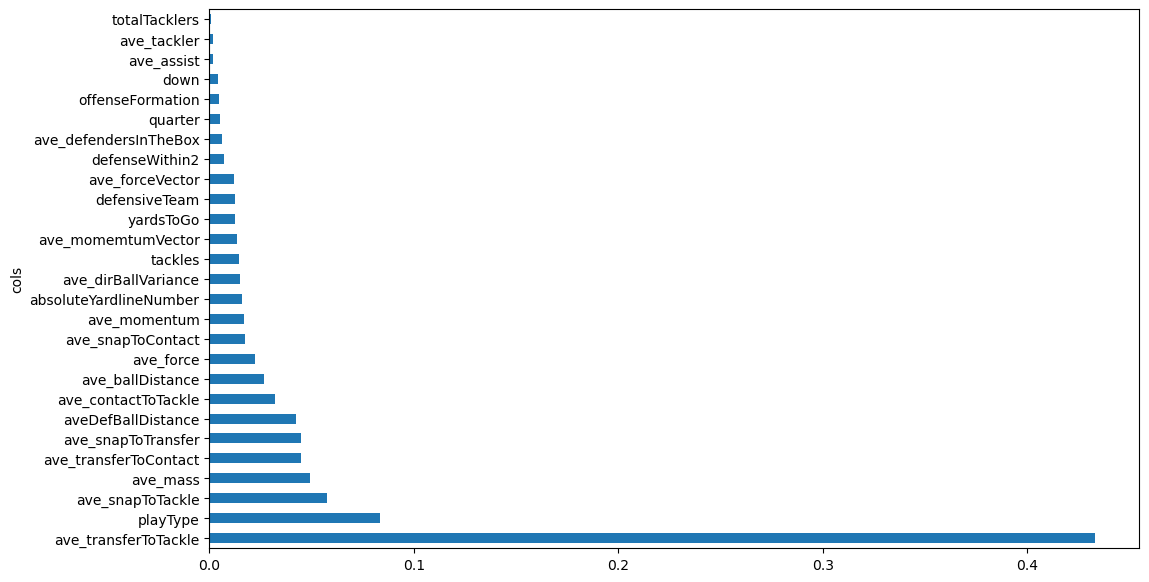

In [179]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi);

In [180]:
perm = PermutationImportance(rfr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.6667 ± 0.0291,ave_transferToTackle
0.2207 ± 0.0264,ave_transferToContact
0.1675 ± 0.0125,playType
0.0731 ± 0.0093,ave_mass
0.0515 ± 0.0025,ave_snapToTackle
0.0493 ± 0.0086,aveDefBallDistance
0.0466 ± 0.0122,ave_snapToTransfer
0.0367 ± 0.0017,ave_contactToTackle
0.0102 ± 0.0028,ave_ballDistance
0.0076 ± 0.0028,ave_snapToContact


In [181]:
weeks_predict_edit['ballTransferToTackle'].describe()

count   10035.00
mean        7.21
std         5.98
min         0.00
25%         3.05
50%         6.40
75%         9.66
max        76.54
Name: ballTransferToTackle, dtype: float64

In [182]:
weeks_predict_edit['ballTransferToTackleQuartiles'] = (
    pd.qcut(weeks_predict_edit['ballTransferToTackle'], 4, labels=['Under 3.05', '3.05-6.40', '6.40-9.66', 'Over 9.66'])
)

In [183]:
weeks_predict_edit['ballTransferToTackleQuartiles'].value_counts()

Under 3.05    2509
3.05-6.40     2509
Over 9.66     2509
6.40-9.66     2508
Name: ballTransferToTackleQuartiles, dtype: int64

In [184]:
transferToTackle_quartiles = weeks_predict_edit.groupby('ballTransferToTackleQuartiles').agg(
    TransferToTackle=('ave_transferToTackle', 'mean'),
    PlayType=('playType', 'mean'),
    Mass=('ave_mass', 'mean'),
    DefBallDistance=('aveDefBallDistance', 'mean'),
    Force=('ave_force', 'mean'),
    Momentum=('ave_momentum', 'mean')
    
).reset_index()

# Sort teams by total tackles in descending order
transferToTackle_sorted = transferToTackle_quartiles.sort_values(by='ballTransferToTackleQuartiles')

transferToTackle_sorted

,ballTransferToTackleQuartiles,TransferToTackle,PlayType,Mass,DefBallDistance,Force,Momentum
0,Under 3.05,4.67,1.11,1337.67,12.97,3.84,3.67
1,3.05-6.40,6.47,1.53,1489.26,8.49,3.33,2.96
2,6.40-9.66,7.24,1.69,1532.12,6.90,3.50,2.94
3,Over 9.66,12.18,1.57,1398.50,8.18,4.06,3.73


In [185]:
table = pd.pivot_table(weeks_predict_edit, values='ave_transferToTackle', index=['ballTransferToTackleQuartiles'],
                       columns=['playType'], aggfunc="mean", margins="True", margins_name='Overall')
table = table.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table

playType,0,1,2,Overall
ballTransferToTackleQuartiles,,,,
Overall,8.99,7.17,7.86,7.64
Under 3.05,4.37,4.20,7.47,4.67
3.05-6.40,7.18,7.11,5.99,6.47
6.40-9.66,8.02,9.62,6.48,7.24
Over 9.66,11.82,15.69,11.05,12.18


In [186]:
weeks_predict_edit['offenseFormation'].value_counts()

5    4972
6    2979
2     799
1     640
4     489
3      80
7      73
0       3
Name: offenseFormation, dtype: int64

# Breakout for Run vs Pass Plays

For run plays

In [187]:
weeks_predict_run = weeks_predict_edit[weeks_predict_edit.playType==2]

In [188]:
weeks_predict_run

,gamePlayId,ave_tackler,ave_assist,ave_mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,ave_defendersInTheBox,ave_ballDistance,ave_dirBallVariance,ave_momentum,ave_force,ave_momemtumVector,ave_forceVector,ave_snapToTransfer,ave_transferToContact,ave_transferToTackle,ave_contactToTackle,ave_snapToTackle,ave_snapToContact,ballTransferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers,tackles,tacklesQuartiles,ballTransferToTackleQuartiles
1436,2022090800101,1.00,0.00,1088.67,2,72.00,1.00,16,1.00,10.00,2,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.71,4.89,2.43,4.59,5.05,12.47,2.00,6.90,1,17,Under 17,Over 9.66
5789,2022090800191,0.50,0.50,1757.50,2,45.00,1.00,16,1.00,10.00,6,6.00,0.71,2.76,5.52,5.12,20.00,17.50,2.04,11.49,13.58,2.29,14.94,12.96,8.00,3.00,5.20,2,10,Under 17,6.40-9.66
8001,2022090800299,1.00,0.00,1665.58,2,27.00,1.00,3,1.00,10.00,6,6.00,1.24,21.18,2.85,3.95,60.00,84.00,2.75,4.61,10.18,5.62,12.56,7.15,10.69,5.00,2.97,1,12,Under 17,Over 9.66
8589,2022090800343,1.00,0.00,1604.17,2,27.00,1.00,3,2.00,10.00,5,6.00,0.37,93.87,3.42,1.78,321.00,167.00,1.04,0.00,2.61,0.00,2.58,0.00,6.66,1.00,5.65,1,60,Over 41,6.40-9.66
10173,2022090800393,1.00,0.00,1925.00,2,52.00,1.00,3,1.00,10.00,5,6.00,1.20,0.51,3.23,3.68,2.00,2.00,1.38,1.18,4.96,3.88,5.09,2.09,5.88,4.00,3.22,1,6,Under 17,3.05-6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103401,2022110700443,0.00,1.00,1514.66,2,34.00,1.00,22,1.00,10.00,4,7.00,1.00,11.56,2.76,5.18,40.00,67.00,1.43,2.12,4.26,3.45,3.46,2.75,9.81,4.00,6.15,2,40,27-41,Over 9.66
12106440,2022110700546,0.00,1.00,1302.50,2,61.00,1.00,22,1.00,10.00,4,6.00,1.31,30.83,0.90,2.88,25.50,116.50,0.61,2.94,5.29,3.65,5.58,3.51,10.01,4.00,6.98,2,33,27-41,Over 9.66
12116188,2022110700950,0.00,1.00,1815.09,2,73.00,2.00,22,2.00,6.00,5,6.00,0.89,39.68,0.85,2.18,18.00,61.00,1.07,1.34,3.36,2.46,3.28,2.00,6.42,6.00,5.01,2,30,27-41,6.40-9.66
12139048,20221107002064,0.00,1.00,1377.25,2,55.00,3.00,22,1.00,10.00,4,6.00,0.82,18.71,1.02,3.10,20.00,59.50,1.76,8.86,10.70,2.52,12.19,10.36,10.34,4.00,4.99,2,21,17-27,Over 9.66


In [189]:
X = weeks_predict_run.drop(['gamePlayId', 'ballTransferToTackle', 'ballTransferToTackleQuartiles', 'tacklesQuartiles'],axis=1)
y = weeks_predict_run.ballTransferToTackle

In [190]:
X.shape, y.shape

((5337, 27), (5337,))

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)

In [192]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4002, 27), (1335, 27), (4002,), (1335,))

In [193]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [194]:
y_pred = rfr_model.predict(X_test)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.41652273194030376


In [195]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
19,ave_transferToTackle,0.34
2,ave_mass,0.11
20,ave_contactToTackle,0.08
21,ave_snapToTackle,0.08
24,aveDefBallDistance,0.05
18,ave_transferToContact,0.04
17,ave_snapToTransfer,0.03
11,ave_ballDistance,0.03
14,ave_force,0.03
13,ave_momentum,0.03


In [196]:
perm = PermutationImportance(rfr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.5511 ± 0.0256,ave_transferToTackle
0.1240 ± 0.0159,ave_mass
0.0677 ± 0.0051,ave_snapToTackle
0.0621 ± 0.0172,ave_contactToTackle
0.0585 ± 0.0112,aveDefBallDistance
0.0427 ± 0.0056,ave_transferToContact
0.0134 ± 0.0082,ave_ballDistance
0.0122 ± 0.0035,ave_snapToContact
0.0066 ± 0.0046,ave_force
0.0056 ± 0.0023,ave_momemtumVector


For pass plays

In [197]:
weeks_predict_pass = weeks_predict_edit[weeks_predict_edit.playType==1]

In [198]:
weeks_predict_pass

,gamePlayId,ave_tackler,ave_assist,ave_mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,ave_defendersInTheBox,ave_ballDistance,ave_dirBallVariance,ave_momentum,ave_force,ave_momemtumVector,ave_forceVector,ave_snapToTransfer,ave_transferToContact,ave_transferToTackle,ave_contactToTackle,ave_snapToTackle,ave_snapToContact,ballTransferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers,tackles,tacklesQuartiles,ballTransferToTackleQuartiles
149,202209080056,1.00,0.00,1265.33,1,85.00,1.00,16,1.00,10.00,5,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,0.00,4.01,0.00,6.95,0.00,0.52,3.00,9.52,1,26,17-27,Under 3.05
2384,2022090800122,1.00,0.00,1452.00,1,65.00,1.00,16,2.00,3.00,5,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,9.11,12.01,3.61,14.55,11.86,8.00,2.00,12.72,1,61,Over 41,6.40-9.66
4541,2022090800167,1.00,0.00,1540.00,1,57.00,1.00,16,2.00,8.00,1,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,4.88,6.91,2.07,8.98,6.97,6.07,3.00,9.81,1,31,27-41,3.05-6.40
6076,2022090800212,1.00,0.00,1452.00,1,44.00,1.00,16,2.00,9.00,5,6.00,0.14,11.14,9.87,6.08,110.00,68.00,4.27,1.72,4.71,2.99,8.96,5.99,2.38,1.00,17.79,1,61,Over 41,Under 3.05
11362,2022090800414,1.00,0.00,1094.58,1,53.00,1.00,3,2.00,9.00,1,5.00,3.03,130.46,2.82,3.72,368.00,486.00,2.15,9.81,11.00,1.69,10.84,9.92,12.60,1.00,14.71,1,21,17-27,Over 9.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12107696,2022110700588,0.00,1.00,1206.00,1,63.00,1.00,22,3.00,8.00,5,5.00,2.18,81.72,1.97,3.38,71.50,197.50,1.34,1.15,7.17,6.38,8.15,2.48,3.77,2.00,8.61,2,21,17-27,3.05-6.40
12109375,2022110700646,0.00,1.00,1529.84,1,70.00,1.00,22,2.00,13.00,1,5.00,0.99,10.54,2.59,4.88,28.00,52.00,1.63,0.00,14.19,0.00,15.72,0.00,0.37,4.00,5.09,2,30,27-41,Under 3.05
12140438,20221107002096,0.00,1.00,1341.25,1,45.00,3.00,22,1.00,20.00,4,6.00,1.24,17.96,1.82,4.71,34.00,76.50,1.91,2.23,5.13,3.28,6.54,4.05,5.14,2.00,16.43,2,64,Over 41,3.05-6.40
12171983,20221107003323,0.00,1.00,1311.25,1,23.00,4.00,2,3.00,14.00,5,6.00,0.58,13.99,1.29,3.48,22.00,61.00,3.30,11.96,18.31,7.01,21.09,15.03,12.67,3.00,8.52,2,75,Over 41,Over 9.66


In [199]:
X = weeks_predict_pass.drop(['gamePlayId', 'ballTransferToTackle', 'ballTransferToTackleQuartiles', 'tacklesQuartiles'],axis=1)
y = weeks_predict_pass.ballTransferToTackle
X.shape, y.shape

((4131, 27), (4131,))

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3098, 27), (1033, 27), (3098,), (1033,))

In [201]:
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.5019330641825839


In [202]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
19,ave_transferToTackle,0.50
18,ave_transferToContact,0.16
21,ave_snapToTackle,0.07
17,ave_snapToTransfer,0.03
11,ave_ballDistance,0.03
20,ave_contactToTackle,0.03
24,aveDefBallDistance,0.02
13,ave_momentum,0.02
2,ave_mass,0.02
14,ave_force,0.02


In [203]:
perm = PermutationImportance(rfr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.8154 ± 0.0384,ave_transferToTackle
0.4809 ± 0.0485,ave_transferToContact
0.0431 ± 0.0032,ave_snapToTackle
0.0372 ± 0.0080,ave_snapToContact
0.0312 ± 0.0103,ave_contactToTackle
0.0126 ± 0.0073,ave_snapToTransfer
0.0116 ± 0.0060,ave_ballDistance
0.0062 ± 0.0019,aveDefBallDistance
0.0039 ± 0.0034,ave_mass
0.0029 ± 0.0027,ave_force


# Run vs Pass for Number of Tackles

In [204]:
X = weeks_predict_run.drop(['gamePlayId', 'ballTransferToTackle', 'tackles', 'tacklesQuartiles', 'ballTransferToTackleQuartiles'],axis=1)
y = weeks_predict_run.tackles

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4002, 26), (1335, 26), (4002,), (1335,))

In [206]:
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.5951580694540952


In [207]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
2,ave_mass,0.33
6,defensiveTeam,0.11
24,aveDefBallDistance,0.04
17,ave_snapToTransfer,0.04
14,ave_force,0.04
11,ave_ballDistance,0.04
20,ave_contactToTackle,0.04
4,absoluteYardlineNumber,0.03
15,ave_momemtumVector,0.03
13,ave_momentum,0.03


In [208]:
perm = PermutationImportance(rfr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.5977 ± 0.0320,ave_mass
0.1710 ± 0.0060,defensiveTeam
0.0273 ± 0.0135,ave_tackler
0.0252 ± 0.0085,totalTacklers
0.0139 ± 0.0062,ave_assist
0.0024 ± 0.0054,aveDefBallDistance
0.0022 ± 0.0035,ave_transferToTackle
0.0020 ± 0.0019,ave_defendersInTheBox
0.0015 ± 0.0047,ave_dirBallVariance
0.0006 ± 0.0018,down


In [209]:
X = weeks_predict_pass.drop(['gamePlayId', 'ballTransferToTackle', 'tackles', 'tacklesQuartiles', 'ballTransferToTackleQuartiles'],axis=1)
y = weeks_predict_pass.tackles

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3098, 26), (1033, 26), (3098,), (1033,))

In [211]:
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.5847557157268312


In [212]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
2,ave_mass,0.42
6,defensiveTeam,0.14
24,aveDefBallDistance,0.04
17,ave_snapToTransfer,0.03
11,ave_ballDistance,0.03
4,absoluteYardlineNumber,0.03
13,ave_momentum,0.03
14,ave_force,0.03
20,ave_contactToTackle,0.03
15,ave_momemtumVector,0.03


In [213]:
perm = PermutationImportance(rfr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.6968 ± 0.0328,ave_mass
0.2793 ± 0.0200,defensiveTeam
0.0113 ± 0.0055,aveDefBallDistance
0.0047 ± 0.0017,totalTacklers
0.0041 ± 0.0071,ave_contactToTackle
0.0040 ± 0.0024,ave_assist
0.0036 ± 0.0044,ave_snapToTransfer
0.0027 ± 0.0025,ave_transferToContact
0.0021 ± 0.0022,ave_momemtumVector
0.0021 ± 0.0025,ave_transferToTackle


# Look At Most Impactful for Transfer To Tackle

In [214]:
weeks_predict_transferToTackle = weeks_predict_edit.copy()

In [215]:
weeks_predict_transferToTackle = weeks_predict_transferToTackle.drop('ballTransferToTackleQuartiles', axis=1)

In [216]:
weeks_predict_transferToTackle = weeks_predict_transferToTackle.drop(columns=['ave_contactToTackle', 'ave_snapToTackle',
                                                                             'ave_snapToContact', 'ballTransferToTackle',
                                                                             'ave_transferToContact'])

In [217]:
weeks_predict_transferToTackle.head(5)

,gamePlayId,ave_tackler,ave_assist,ave_mass,playType,absoluteYardlineNumber,quarter,defensiveTeam,down,yardsToGo,offenseFormation,ave_defendersInTheBox,ave_ballDistance,ave_dirBallVariance,ave_momentum,ave_force,ave_momemtumVector,ave_forceVector,ave_snapToTransfer,ave_transferToTackle,defenseWithin2,aveDefBallDistance,totalTacklers,tackles,tacklesQuartiles
149,202209080056,1.00,0.00,1265.33,1,85.00,1.00,16,1.00,10.00,5,6.00,0.67,49.72,1.39,4.01,69.00,199.00,2.94,4.01,3.00,9.52,1,26,17-27
1161,202209080080,1.00,0.00,1418.33,0,79.00,1.00,16,2.00,4.00,1,6.00,0.37,1.00,7.97,2.77,8.00,3.00,0.00,6.77,2.00,10.77,1,46,Over 41
1436,2022090800101,1.00,0.00,1088.67,2,72.00,1.00,16,1.00,10.00,2,6.00,2.48,52.92,1.96,5.41,104.00,286.00,1.27,4.89,2.00,6.90,1,17,Under 17
2384,2022090800122,1.00,0.00,1452.00,1,65.00,1.00,16,2.00,3.00,5,6.00,0.57,8.35,4.63,4.21,39.00,35.00,2.85,12.01,2.00,12.72,1,61,Over 41
4541,2022090800167,1.00,0.00,1540.00,1,57.00,1.00,16,2.00,8.00,1,6.00,1.59,4.62,6.41,10.21,30.00,47.00,2.09,6.91,3.00,9.81,1,31,27-41


In [218]:
X = weeks_predict_transferToTackle.drop(['gamePlayId', 'ave_transferToTackle', 'tacklesQuartiles'],axis=1)
y = weeks_predict_transferToTackle.ave_transferToTackle
X.shape, y.shape

((10035, 22), (10035,))

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7526, 22), (2509, 22), (7526,), (2509,))

In [220]:
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 0.5513174688111151


In [221]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rfr_model, X)
fi

,cols,imp
13,ave_momentum,0.15
19,aveDefBallDistance,0.15
17,ave_snapToTransfer,0.09
14,ave_force,0.09
2,ave_mass,0.08
11,ave_ballDistance,0.06
4,absoluteYardlineNumber,0.04
21,tackles,0.04
3,playType,0.04
12,ave_dirBallVariance,0.03


In [222]:
perm = PermutationImportance(rfr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.7543 ± 0.0881,playType
0.2374 ± 0.0530,ave_snapToTransfer
0.2291 ± 0.0348,aveDefBallDistance
0.2264 ± 0.0342,ave_momentum
0.0987 ± 0.0169,ave_mass
0.0906 ± 0.0144,ave_force
0.0286 ± 0.0088,defenseWithin2
0.0165 ± 0.0091,ave_ballDistance
0.0107 ± 0.0028,ave_dirBallVariance
0.0095 ± 0.0038,ave_momemtumVector


# Effects of Offensive & Defensive Formations

In [223]:
weeks_predict.head(5)

,gameId,playId,nflId,displayName,frameId,club,x,y,s,a,dis,o,dir,event,gamePlayId,tackler,assist,forcedFumble,pff_missedTackle,position,totalInches,mass,playType,absoluteYardlineNumber,ballCarrierId,quarter,possessionTeam,defensiveTeam,playResult,down,yardsToGo,offenseFormation,defendersInTheBox,week,homeTeamAbbr,visitorTeamAbbr,xBallLocation,yBallLocation,ballDistance,dirBallCarrier,dirBallVariance,momentum,force,momemtumVector,forceVector,first_contact,fumble,out_of_bounds,snap,tackle,transfer,xSnap,ySnap,xContact,yContact,xTransfer,yTransfer,xTackle,yTackle,snapToTransfer,transferToContact,transferToTackle,contactToTackle,snapToTackle,snapToContact,xBallSnap,xBallTransfer,xBallContact,xBallTackle,ballSnapToTransfer,ballSnapToContact,ballTransferToContact,ballContactToTackle,ballSnapToTackle,defenseWithin2,aveDefBallDistance,totalTacklers,tackles,ballTransferToTackle
149,2022090800.00,56.00,43294,Jalen Ramsey,18.00,LA,78.66,33.87,1.10,3.17,0.12,116.19,127.74,tackle,202209080056,1.00,0.00,0.00,0.00,CB,73.00,1265.33,pass,85.00,42489.00,1.00,BUF,LA,6.00,1.00,10.00,SHOTGUN,6.00,1.00,LA,BUF,79.33,33.85,0.67,78.02,49.72,1.39,4.01,69.00,199.00,0.00,0.00,0.00,0.00,1.00,0.00,77.95,40.78,0.00,0.00,78.15,37.85,78.66,33.87,2.94,0.00,4.01,0.00,6.95,0.00,80.60,79.85,79.33,79.33,0.75,1.27,0.52,0.00,1.27,3.00,9.52,1,26,0.52
1161,2022090800.00,80.00,53532,Ernest Jones,26.00,LA,72.96,42.23,5.62,1.95,0.56,336.48,327.47,tackle,202209080080,1.00,0.00,0.00,0.00,ILB,74.00,1418.33,direct,79.00,46076.00,1.00,BUF,LA,7.00,2.00,4.00,EMPTY,6.00,1.00,LA,BUF,73.10,42.57,0.37,326.47,1.00,7.97,2.77,8.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,73.89,35.52,74.35,39.26,0.00,0.00,72.96,42.23,0.00,0.00,6.77,3.28,6.77,3.77,83.80,83.80,75.53,73.10,0.00,8.27,8.27,2.43,10.70,2.00,10.77,1,46,10.70
1436,2022090800.00,101.00,42816,Troy Hill,45.00,LA,69.08,39.50,1.80,4.97,0.20,210.96,198.30,tackle,2022090800101,1.00,0.00,0.00,0.00,CB,71.00,1088.67,run,72.00,47857.00,1.00,BUF,LA,7.00,1.00,10.00,I_FORM,6.00,1.00,LA,BUF,66.69,40.15,2.48,251.22,52.92,1.96,5.41,104.00,286.00,0.00,0.00,0.00,0.00,1.00,0.00,64.67,40.76,69.59,41.88,64.88,42.01,69.08,39.50,1.27,4.71,4.89,2.43,4.59,5.05,79.61,79.16,70.62,66.69,0.45,8.99,8.54,3.93,12.92,2.00,6.90,1,17,12.47
2384,2022090800.00,122.00,38577,Bobby Wagner,29.00,LA,60.31,47.90,3.19,2.90,0.33,245.75,289.12,tackle,2022090800122,1.00,0.00,0.00,0.00,ILB,72.00,1452.00,pass,65.00,47857.00,1.00,BUF,LA,6.00,2.00,3.00,SHOTGUN,6.00,1.00,LA,BUF,59.89,47.51,0.57,297.47,8.35,4.63,4.21,39.00,35.00,0.00,0.00,0.00,0.00,1.00,0.00,60.07,33.35,62.42,44.97,61.28,35.93,60.31,47.90,2.85,9.11,12.01,3.61,14.55,11.86,68.96,67.89,63.78,59.89,1.07,5.18,4.11,3.89,9.07,2.00,12.72,1,61,8.00
4541,2022090800.00,167.00,43298,Leonard Floyd,18.00,LA,46.84,25.08,4.16,6.63,0.46,221.59,237.47,tackle,2022090800167,1.00,0.00,0.00,0.00,DE,77.00,1540.00,pass,57.00,42489.00,1.00,BUF,LA,12.00,2.00,8.00,EMPTY,6.00,1.00,LA,BUF,45.61,24.07,1.59,242.09,4.62,6.41,10.21,30.00,47.00,0.00,0.00,0.00,0.00,1.00,0.00,52.42,32.11,48.44,26.39,51.35,30.31,46.84,25.08,2.09,4.88,6.91,2.07,8.98,6.97,53.30,51.68,47.77,45.61,1.62,5.53,3.91,2.16,7.69,3.00,9.81,1,31,6.07


In [224]:
weeks_predict['defendersInTheBox'].value_counts()

6.00     5820
7.00     4139
8.00     1708
5.00     1145
4.00      316
9.00      167
3.00       50
10.00      31
11.00      12
1.00        1
Name: defendersInTheBox, dtype: int64

In [225]:
weeks_predict['offenseFormation'].value_counts()

SHOTGUN       6486
SINGLEBACK    4139
I_FORM        1113
EMPTY          782
PISTOL         656
JUMBO          110
WILDCAT        103
Name: offenseFormation, dtype: int64

In [226]:
formations = weeks_predict[['defendersInTheBox', 'offenseFormation', 'ballTransferToTackle']]

In [227]:
formations

,defendersInTheBox,offenseFormation,ballTransferToTackle
149,6.00,SHOTGUN,0.52
1161,6.00,EMPTY,10.70
1436,6.00,I_FORM,12.47
2384,6.00,SHOTGUN,8.00
4541,6.00,EMPTY,6.07
...,...,...,...
12172167,6.00,SHOTGUN,12.67
12173124,6.00,SHOTGUN,1.85
12173808,6.00,SHOTGUN,1.85
12180122,6.00,PISTOL,15.44


In [228]:
formations = formations[formations.offenseFormation != 'JUMBO']
formations = formations[formations.offenseFormation != 'WILDCAT']
formations = formations[formations.offenseFormation != 'PISTOL']
formations = formations[formations.defendersInTheBox != 1]
formations = formations[formations.defendersInTheBox != 11]
formations = formations[formations.defendersInTheBox != 10]
formations = formations[formations.defendersInTheBox != 9]
formations = formations[formations.defendersInTheBox != 3]

In [229]:
table = pd.pivot_table(formations, values='ballTransferToTackle', index=['defendersInTheBox'],
                       columns=['offenseFormation'], aggfunc="mean", margins="True", margins_name='Overall')
table = table.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table

offenseFormation,EMPTY,I_FORM,SHOTGUN,SINGLEBACK,Overall
defendersInTheBox,,,,,
Overall,5.48,8.46,6.75,8.37,7.36
5.0,5.41,3.66,6.61,9.44,6.37
4.0,5.79,9.60,7.30,6.59,6.83
6.0,5.44,8.34,6.81,8.73,7.24
8.0,3.69,8.46,6.65,7.64,7.65
7.0,5.55,8.49,6.61,8.44,7.74


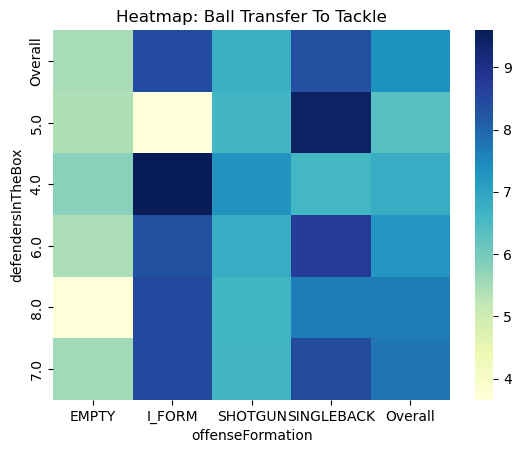

In [230]:
ax = sns.heatmap(table, cmap="YlGnBu")
ax.set_title("Heatmap: Ball Transfer To Tackle")

plt.show()

In [231]:
table_amount = pd.pivot_table(formations, values='ballTransferToTackle', index=['defendersInTheBox'],
                       columns=['offenseFormation'], aggfunc="sum", margins="True", margins_name='Overall')
table_amount = table_amount.assign(sortkey=table.index == 'Overall')\
                .sort_values(['sortkey','Overall'], ascending=[False, True])\
                .drop('sortkey', axis=1)
table_amount

offenseFormation,EMPTY,I_FORM,SHOTGUN,SINGLEBACK,Overall
defendersInTheBox,,,,,
4.0,590.66,28.79,1517.73,19.77,2156.95
5.0,1661.97,3.66,5189.77,321.05,7176.45
8.0,3.69,3208.22,1947.34,6606.50,11765.75
7.0,294.15,4483.99,9077.42,15632.24,29487.80
6.0,1627.29,1334.65,25657.67,11438.48,40058.09
Overall,4177.76,9059.31,43389.93,34018.04,90645.04
